<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [296]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

**Comments:** 
>Load the file using csv module, convert the numerical strings to floats and add to a dictionary

In [297]:
with open('./sat_scores.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile)
    sat_dict = {'State':[], 'Rate':[], 'Verbal':[], 'Math':[]}
    rownum = -1
    for row in reader:
        rownum += 1
        if rownum == 0: continue
        if row[0]=='All': continue
        sat_dict['State'].append(row[0])
        sat_dict['Rate'].append(float(row[1]))
        sat_dict['Verbal'].append(float(row[2]))
        sat_dict['Math'].append(float(row[3]))
    csvfile.close()
                
print sat_dict            
    

{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0], 'Verbal': [50

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [298]:
#Make a DataFrame object with the SAT dictionary
sat_df1 = pd.DataFrame(sat_dict)
print sat_df1.head()

    Math  Rate State  Verbal
0  510.0  82.0  CT    509.0 
1  513.0  81.0  NJ    499.0 
2  515.0  79.0  MA    511.0 
3  505.0  77.0  NY    495.0 
4  516.0  72.0  NH    520.0 


**Comments:** 
>Order of columns of original file not preserved. Original order is 'State', 'Rate', 'Verbal', 'Math'

In [299]:
#Make a DataFrame object with the SAT dictionary, and pass in the column names in the correct order
#Check the datatype of each column using .dtypes
sat_df1 = pd.DataFrame(sat_dict, columns = ['State', 'Rate', 'Verbal', 'Math'])
print sat_df1.head()
print sat_df1.dtypes

  State  Rate  Verbal   Math
0  CT    82.0  509.0   510.0
1  NJ    81.0  499.0   513.0
2  MA    79.0  511.0   515.0
3  NY    77.0  495.0   505.0
4  NH    72.0  520.0   516.0
State     object 
Rate      float64
Verbal    float64
Math      float64
dtype: object


In [300]:
sat_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null float64
Verbal    51 non-null float64
Math      51 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


**Comments:**
>Order of the columns is now correct after passing in list of columns into pd.DataFrame() function

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [301]:
#Make a DataFrame using pd.read_csv() method, and convert the numerical strings to floats
sat_df2 = pd.read_csv('./sat_scores.csv')
def convert_float(data):
    try:
        return(float(data))
    except:
        return data
sat_df2 = sat_df2.apply(convert_float)
sat_df2.drop(sat_df2.index[51], inplace=True)
sat_df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [302]:
sat_df2.dtypes

State     object
Rate      int64 
Verbal    int64 
Math      int64 
dtype: object

**Ans:** 
>The main difference between the inputing from dictionary and loading using pd.read_csv() function is that when you make a dataframe using a dictionary, the order of the columns in your original file may not be preserved. You can overcome this by explicitly passing the column names in the correct order into the pd.DataFrame() function when making the dataframe from a dicitonary.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [303]:
sat_df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [304]:
sat_df2.shape

(51, 4)

In [305]:
sat_df2.dtypes

State     object
Rate      int64 
Verbal    int64 
Math      int64 
dtype: object

In [306]:
#Data dictionary imported from an excel file
data_dictionary = pd.read_excel('./Data_dict_SAT.xlsx')
pd.set_option('display.max_colwidth', -1)
data_dictionary.fillna('-')

,Variable name,Variable Description,Variable Data Type
0,State,Different states of USA where SAT scores were collected from,String/Object
1,Rate,Average rate of college rejection of high school students who sat for SATs,Integer
2,Verbal,Average score of high school students on the Verbal section of SATs,Integer
3,Math,Average score of high school students on the Math section of SATs,Integer
4,-,-,-
5,Shape of Data,"51 rows, and 4 columns",-
6,Data contained in each row,Each row contains data for a single USA state,-


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [307]:
sat_df2.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [308]:
Rate_range_of_scores = np.max(sat_df2.Rate)-np.min(sat_df2.Rate)
Verbal_range_of_scores = np.max(sat_df2.Verbal)-np.min(sat_df2.Verbal)
Math_range_of_scores = np.max(sat_df2.Math)-np.min(sat_df2.Math)
print "Rate range:", Rate_range_of_scores
print "Verbal range:", Verbal_range_of_scores
print "Math range: ", Math_range_of_scores

Rate range: 78
Verbal range: 111
Math range:  164


**Comments:** 
>Choose the number of bins for each variable such that interval captured by each bin is = 10
>Hence, Rate variable bins = 8, Verbal variable bins = 11, Math variable bins = 16, 

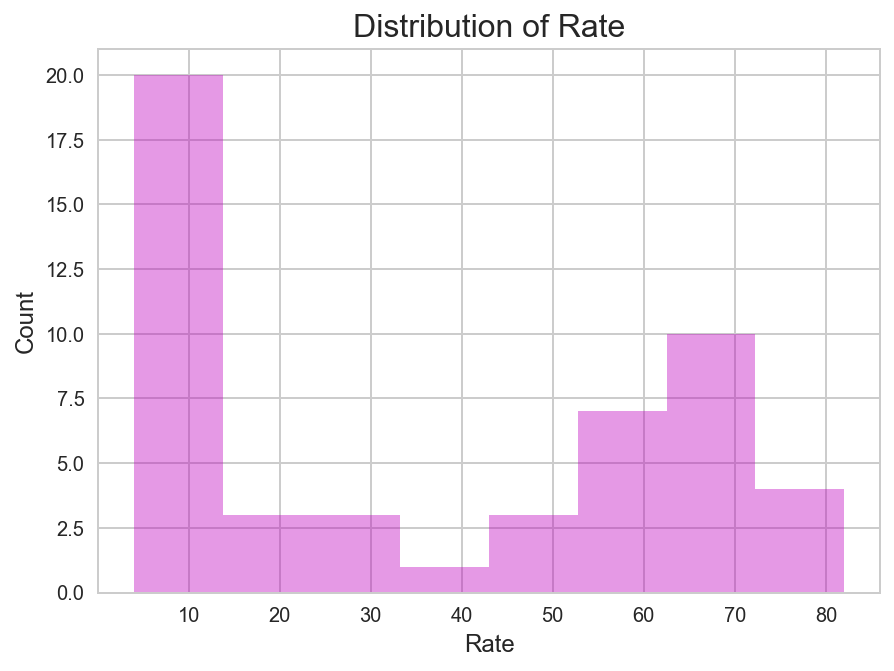

In [309]:
#Distribution for Rate
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(7,5)
sns.set(style='whitegrid')
sns.distplot(sat_df2.Rate, color = 'm', bins = 8, kde=False)
plt.xlabel("Rate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title('Distribution of Rate', fontsize=16)

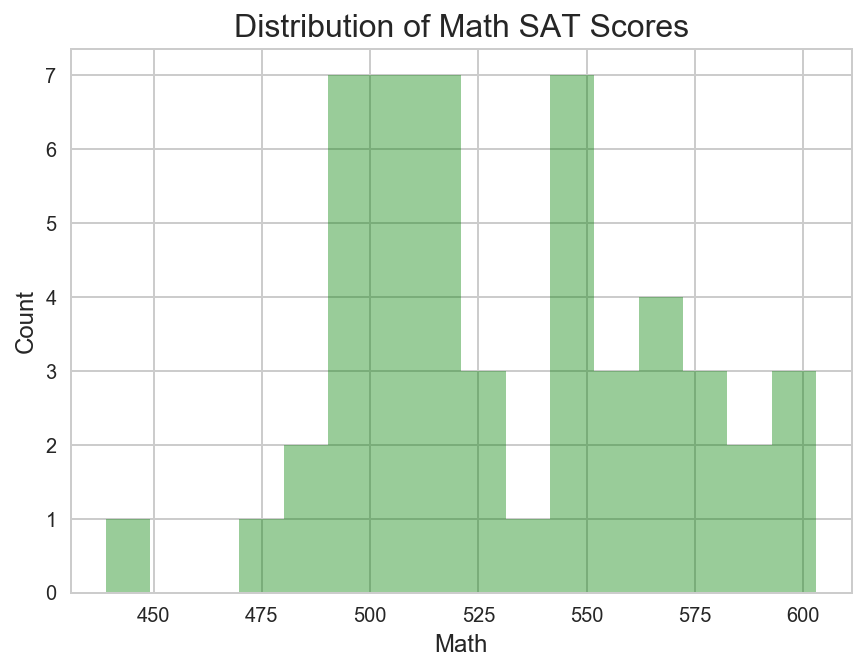

In [310]:
#Distribution for Math
plt.rcParams['figure.figsize']=(7,5)
sns.set_style("whitegrid")
sns.distplot(sat_df2.Math, color = 'g', bins = 16, kde=False)
plt.xlabel("Math", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title('Distribution of Math SAT Scores', fontsize=16)

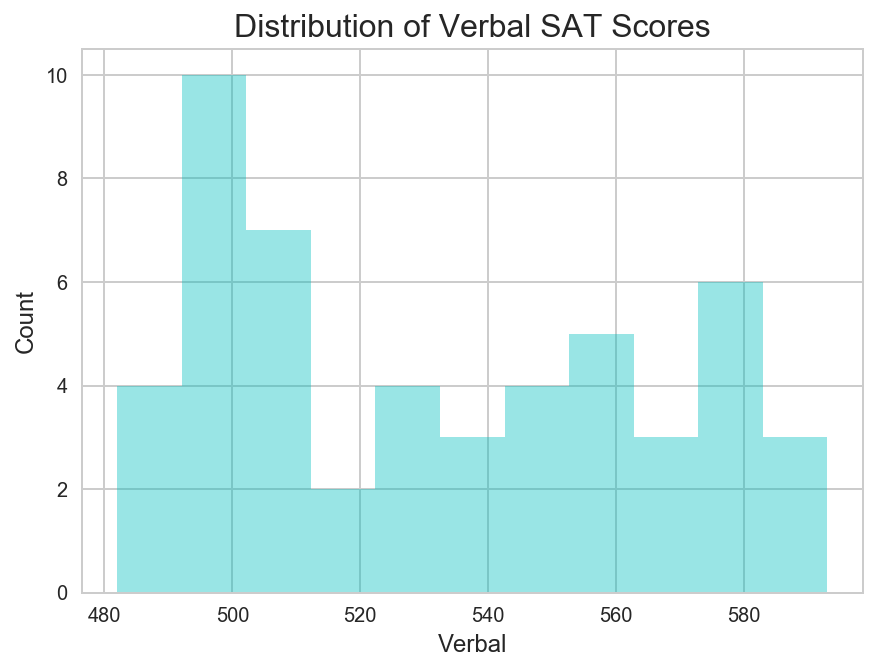

In [311]:
#Distribution for Verbal
plt.rcParams['figure.figsize']=(7,5)
sns.set_style("whitegrid")
sns.distplot(sat_df2.Verbal, color = 'c', bins = 11, kde=False)
plt.xlabel("Verbal", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title('Distribution of Verbal SAT Scores', fontsize=16)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

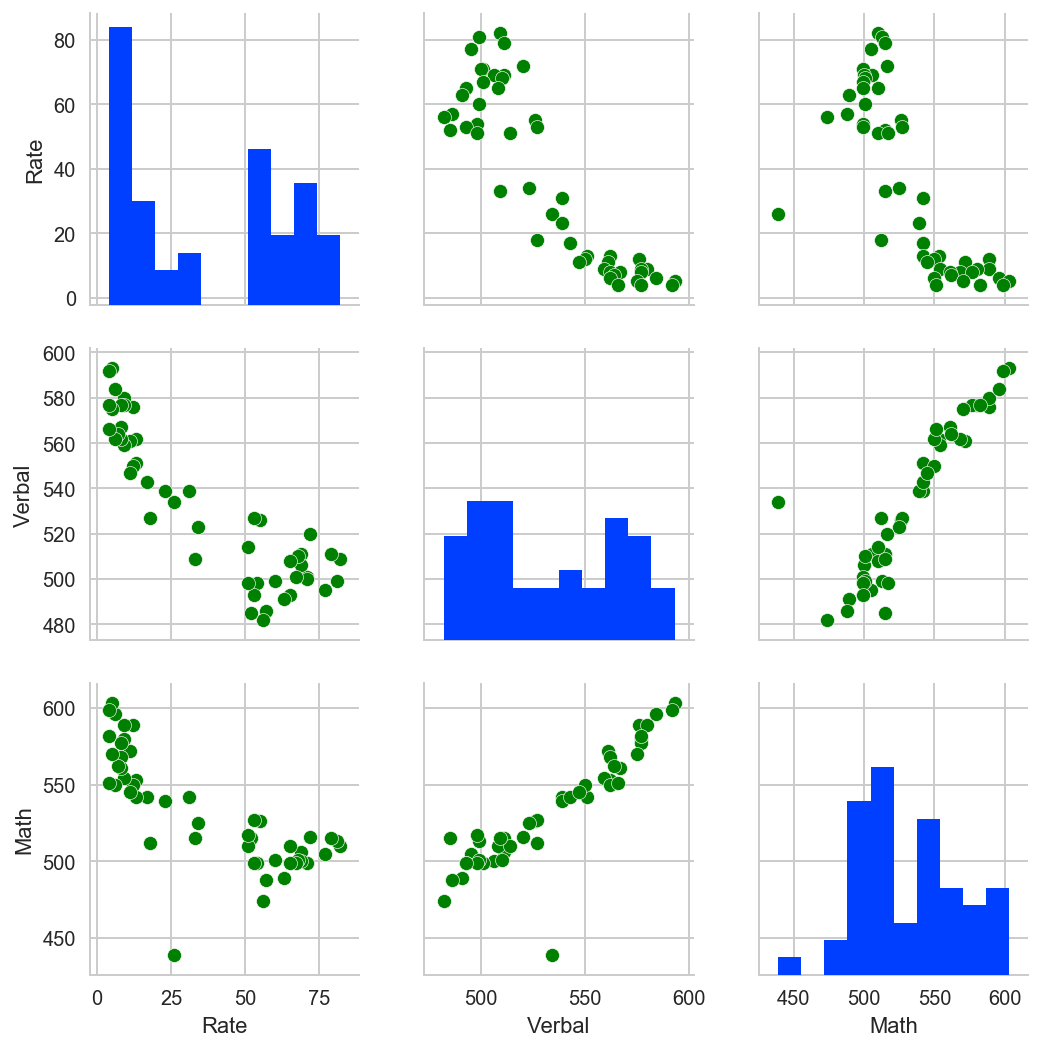

In [312]:
sns.set_palette('bright')
sns.pairplot(sat_df2, plot_kws = {'color':'g'})

In [313]:
sat_df2.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


**Comments:**
>There is a strong positive correlation between averageSAT Verbal and Math scores. There is an outlier state which has a higher average Verbal score relative to average Math Score.

>There is a strong negative correlation between average Rate of rejection of college applications and average Verbal SAT scores.

>There is a negative correlation between average Rate of rejection of college applications and average Math SAT scores. There is an outlier state where there is a lower average rate of rejection relative to average Math SAT scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

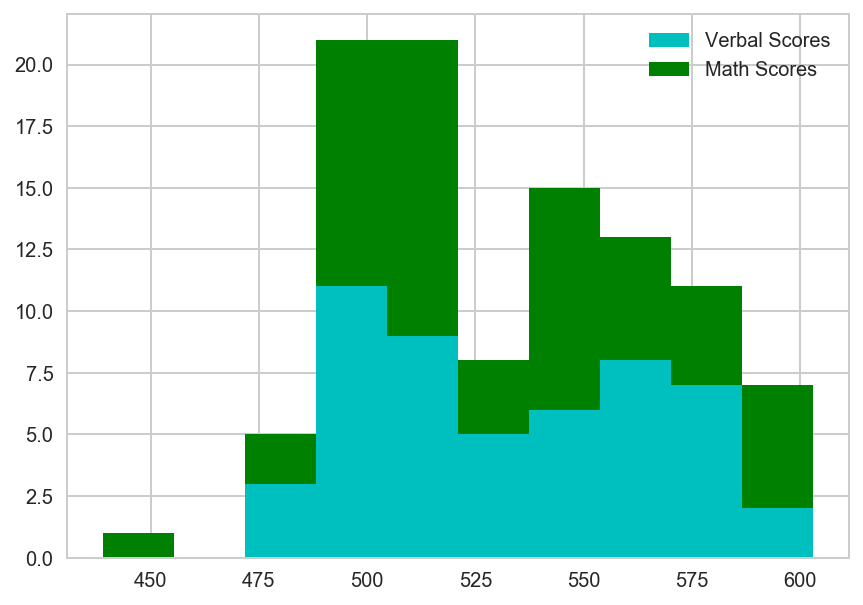

In [314]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(7,5)
plt.hist([sat_df2.Verbal, sat_df2.Math], bins=10, stacked=True, color=['c','g'])
plt.legend(['Verbal Scores', 'Math Scores'], loc='upper right')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [315]:
#Create a new Dataframe with only the Verbal and Math scores
sat_verbal_math = sat_df2[['Verbal','Math']]

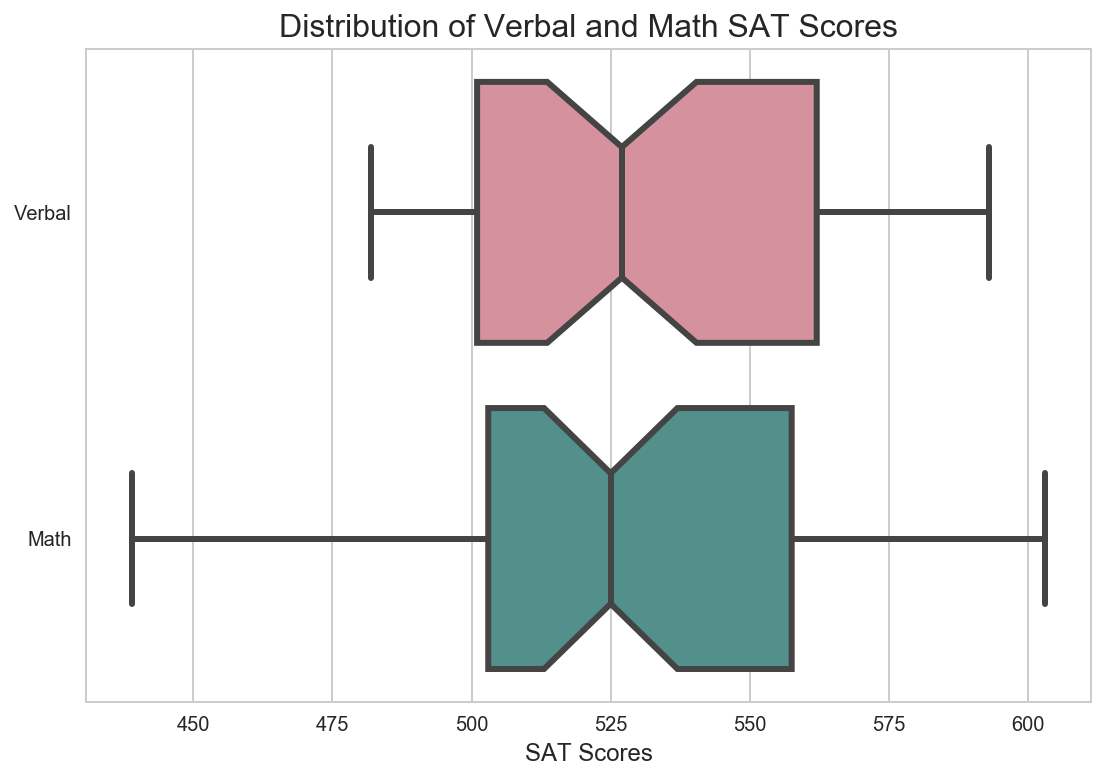

In [316]:
#Boxplots before scaling
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.boxplot(data=sat_verbal_math, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax, palette='husl')
ax.set_title('Distribution of Verbal and Math SAT Scores', fontsize=16)
ax.set_xlabel('SAT Scores', fontsize=12)
plt.show()

In [317]:
#Need to make an object out of the class StandardScaler()
#Next, fit the data and transform it
#Sklearn does not accept pandas Dataframe, so you need to convert to numpy array first
# .reshape(-1,1) --> -1 means that guess the shape, 1 means convert to 1D array

In [318]:
#Scale the Math and Verbal variables
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
math_scaled = scaled.fit_transform(sat_verbal_math['Math'].values.reshape(-1,1))
verbal_scaled = scaled.fit_transform(sat_verbal_math['Verbal'].values.reshape(-1,1))

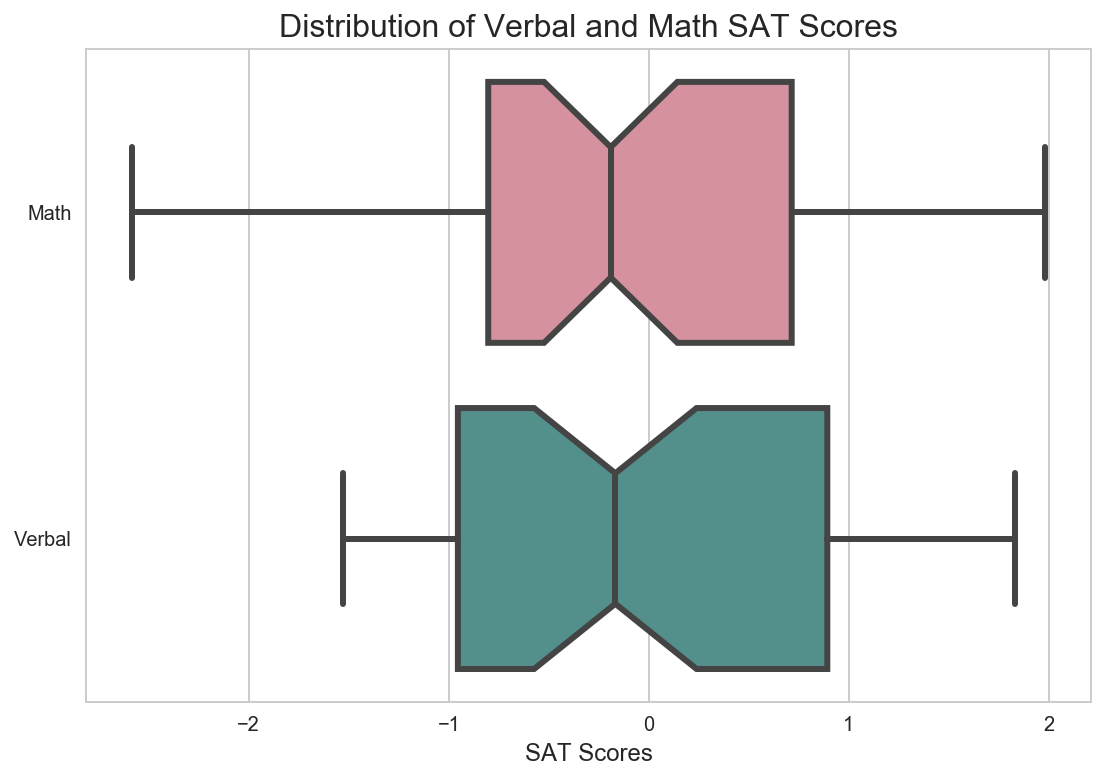

In [319]:
#Boxplots after scaling
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax=sns.boxplot(data = (math_scaled, verbal_scaled), orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax, palette='husl')
ax.set_title('Distribution of Verbal and Math SAT Scores', fontsize=16)
ax.set_xlabel('SAT Scores', fontsize=12)
plt.yticks([0,1], ['Math', 'Verbal'])
plt.show()

In [320]:
sat_df2.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


**Comments:** 
>What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
>**Ans:** A boxplot enables you to compare the distribution of two numerical variables on a single figure, while a scatterplot and histogram do not enable such comparison of distribution.

>What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
>**Ans:** As seen from the descriptive statistics above, Rate has a different scale than Math and Verbal. Math and Verbal both have a range of around 400+ to 600, while Rate has a range of 4 to around 80. Given the difference in the scale, when they are plotted together as boxplots on the same scale, the true distribution of Rate will be underrepresented given the larger scale of Math and Verbal. This does not allow us to compare the range and distribution of the 3 variables in a fair manner.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


**Comments:** 
> In order to plot Verbal, Math and Rate appropriately on the same boxplot chart, we need to scale them first so that they have the same scale and thus their distribution can be compared fairly. 
> The variables will be scaled through "standardization", whereby each variable will now have a mean of 0 and a standard deviation of 1.
> This is achieved through the following formula:

>--> standardized_variable = (variable - mean_of_variable) / std_dev_of_variable

In [321]:
#Create a new Dataframe with the Verbal, Math and Rate scores
verbal_math_rate = sat_df2[['Verbal', 'Math', 'Rate']]
#Standardization
verbal_math_rate = (verbal_math_rate - verbal_math_rate.mean())/verbal_math_rate.std()

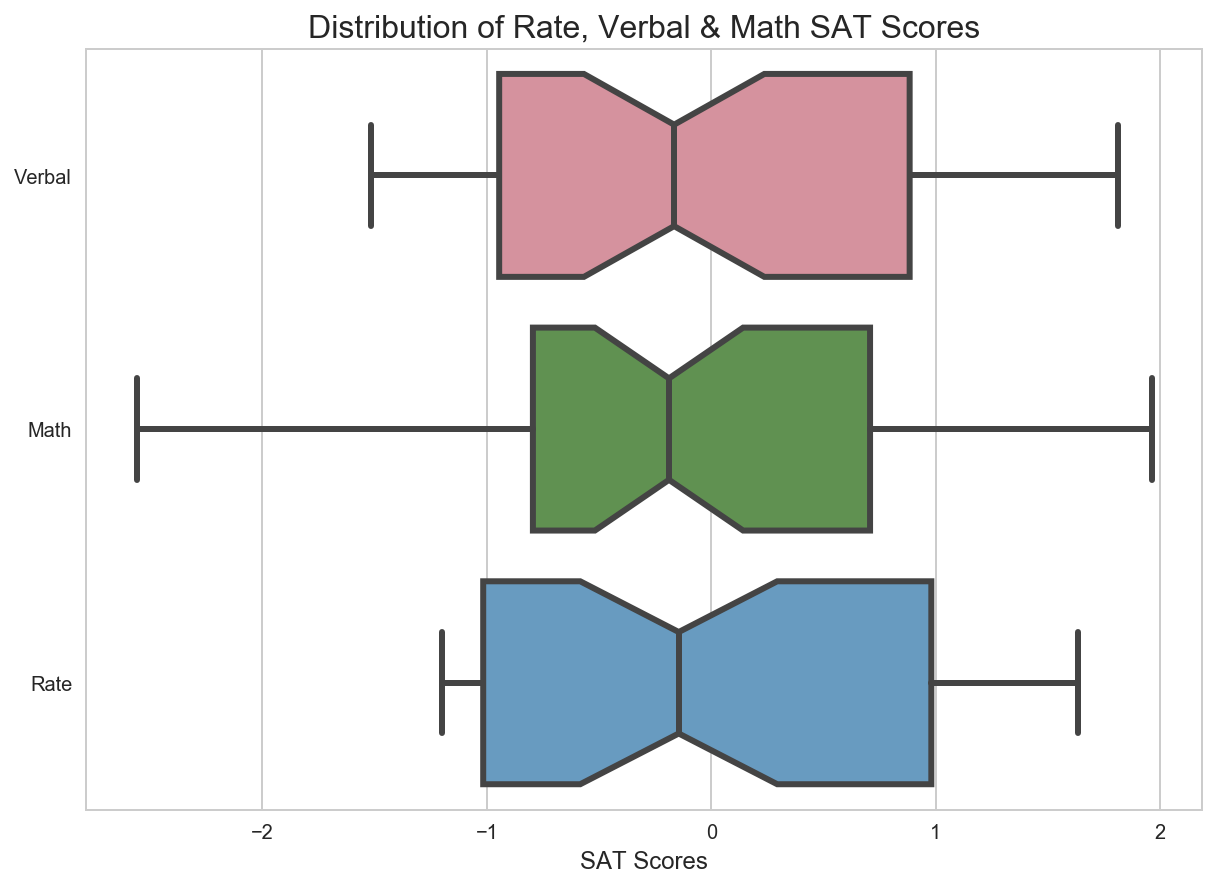

In [322]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()

ax = sns.boxplot(data=verbal_math_rate, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax, palette='husl')
ax.set_title('Distribution of Rate, Verbal & Math SAT Scores', fontsize=16)
ax.set_xlabel('SAT Scores', fontsize=12)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [323]:
#Total number of states
len(sat_df2.Verbal)

51

In [324]:
#list of states that have Verbal scores greater than the average of Verbal scores across states
verbal_mean = sat_df2.Verbal.mean()
sat_verbalm = sat_df2[sat_df2.Verbal>verbal_mean]
sat_verbalm['State'].values

array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

In [325]:
##No. of states with Verbal score greater than the average of Verbal scores across states
len(sat_verbalm['State'].values)

24

In [326]:
#Number of states with Verbal scores less than the average Verbal scores
len(sat_df2.Verbal) - len(sat_verbalm['State'].values)

27

**Comments:**
>Since there are fewer states with a Verbal score above the mean of the Verbal scores across states, this shows that the distribuion of Verbal scores is not normal and it is right skewed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [327]:
#list of states that have Verbal scores greater than the median of Verbal scores across states
verbal_median = sat_df2.Verbal.median()
sat_verbalmm = sat_df2[sat_df2.Verbal>verbal_median]
sat_verbalmm['State'].values

array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

In [328]:
##No. of states with Verbal score greater than the median of Verbal scores across states
len(sat_verbalmm['State'].values)

24

**Comments:**
>Qn: How does this compare to the list of states greater than the mean of Verbal scores? Why?

>Ans: There are 3 more states with Verbal scores above the median as compared to states with Verbal score above the mean. This is because the distribution of the Verbal scores is slightly right skewed as seen from the figure in Qn3. Thus the mean of the Verbal scores is higher than the median, causing fewer states to have a Verbal score above the mean as compared to the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [329]:
sat_df2['Verbal-Math'] = sat_df2.Verbal - sat_df2.Math
sat_df2.head()

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [330]:
#Dataframe with the 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math
sat_df2_v = sat_df2['Verbal-Math'].sort_values(ascending=False)[:10]
sat_v = sat_df2[sat_df2['Verbal-Math'].isin(sat_df2_v)]
sat_v = sat_v.sort_values('Verbal-Math', ascending=False)
sat_v.reset_index(inplace=True)
sat_v.head(3)

,index,State,Rate,Verbal,Math,Verbal-Math
0,27,OH,26,534,439,95
1,29,WV,18,527,512,15
2,50,MS,4,566,551,15


In [331]:
#Dataframe with the 10 states with the greatest gap between Math and Math scores where Verbal is greater than Math
sat_df2_m = sat_df2['Verbal-Math'].sort_values(ascending=True)[:10]
sat_m = sat_df2[sat_df2['Verbal-Math'].isin(sat_df2_m)]
sat_m = sat_m.sort_values('Verbal-Math', ascending=True)
sat_m.reset_index(inplace=True)
sat_m.head(3)

,index,State,Rate,Verbal,Math,Verbal-Math
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [332]:
sat_df2.corr()

,Rate,Verbal,Math,Verbal-Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal-Math,-0.098671,0.044527,-0.395574,1.000000


**Comments:**
>There is a strong positive correlation between average SAT Verbal and Math scores. There is an outlier state which has a higher average Verbal score relative to average Math Score.

>There is a strong negative correlation between average Rate of rejection of college applications and average Verbal SAT scores.
There is a negative correlation between average Rate of rejection of college applications and average Math SAT scores. There is an outlier state where there is a lower average rate of rejection relative to average Math SAT scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [333]:
sat_df2.describe()

,Rate,Verbal,Math,Verbal-Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


**Comments:**
>count: the count of non-null observations for each variable

>mean: mean or average of all the observations for each variable

>std: standard deviation of the observations for each variable

>min: mimimum value of the variable's observations

>25%: 25th percentile value of the variable's observations

>50%: 50th percentile value of the variable's observations

>75%: 75th percentile value of the variable's observations

>max: maximum value of the variable's observations

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [334]:
sat_df2.drop('Verbal-Math', axis=1, inplace=True)
covariance_matrix_sat = sat_df2.cov()
covariance_matrix_sat

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


**Comments:**

>Describe how the covariance matrix is different from the correlation matrix.

>Ans: The covariance matrix returns the joint variability of 2 random variables and is not scaled by the standard deviation of the 2 variables. The correlation matrix is scaled by the standard deviation of the 2 variables and tells us about the strength of a linear relationship between 2 variables.

>What is the process to convert the covariance into the correlation?

>Ans: The covariance is divided by the product of the standard deviation of the 2 variables.

>Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

>Ans: The correlation matrix is preferred since it scales the covariance by the product of the standard deviations of the 2 variables, and is thus more interpretable and helps us to directly compare the linear relationship between the variables irregardless of scale.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [335]:
import pandas as pd
drugs = pd.read_csv('./drug-use-by-age.csv')
pd.set_option('display.max_columns', None)
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


**Comments:**
>There are missing values denoted by -, replace them with NaN

In [336]:
drugs.replace('-', np.NaN, inplace=True)
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [337]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [338]:
drugs.dtypes

age                        object 
n                          int64  
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          object 
crack-use                  float64
crack-frequency            object 
heroin-use                 float64
heroin-frequency           object 
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         object 
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        object 
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             object 
sedative-use               float64
sedative-frequency         float64
dtype: object

**Comments:**
>Column names contain '-', should change to '_'

>cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency variables are encoded as objects while they should be encoded as floats.

In [339]:
#Change column names, from for e.g. 'alcohol-use' to 'alcohol_use'
drugs.columns = [col.replace('-', '_') for col in drugs.columns]
drugs.columns

Index([u'age', u'n', u'alcohol_use', u'alcohol_frequency', u'marijuana_use',
       u'marijuana_frequency', u'cocaine_use', u'cocaine_frequency',
       u'crack_use', u'crack_frequency', u'heroin_use', u'heroin_frequency',
       u'hallucinogen_use', u'hallucinogen_frequency', u'inhalant_use',
       u'inhalant_frequency', u'pain_releiver_use', u'pain_releiver_frequency',
       u'oxycontin_use', u'oxycontin_frequency', u'tranquilizer_use',
       u'tranquilizer_frequency', u'stimulant_use', u'stimulant_frequency',
       u'meth_use', u'meth_frequency', u'sedative_use', u'sedative_frequency'],
      dtype='object')

In [340]:
drugs

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [341]:
#Checking to see unique values of an object
drugs['cocaine_frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0', nan], dtype=object)

In [342]:
#Cleaning, converting the objects to floats
#df.a = df.a.astype(float).fillna(0.0)
datas = ['cocaine_frequency','crack_frequency', 'heroin_frequency', 'inhalant_frequency', 'oxycontin_frequency', 'meth_frequency']
for d in datas:
    drugs[d] = drugs[d].astype(float)

In [343]:
#Cleaning, converting the objects to floats
drugs.dtypes

age                        object 
n                          int64  
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency          float64
crack_use                  float64
crack_frequency            float64
heroin_use                 float64
heroin_frequency           float64
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency         float64
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency        float64
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency             float64
sedative_use               float64
sedative_frequency         float64
dtype: object

In [344]:
#Checking for null values
drugs.isnull().sum()

age                        0
n                          0
alcohol_use                0
alcohol_frequency          0
marijuana_use              0
marijuana_frequency        0
cocaine_use                0
cocaine_frequency          1
crack_use                  0
crack_frequency            3
heroin_use                 0
heroin_frequency           1
hallucinogen_use           0
hallucinogen_frequency     0
inhalant_use               0
inhalant_frequency         1
pain_releiver_use          0
pain_releiver_frequency    0
oxycontin_use              0
oxycontin_frequency        1
tranquilizer_use           0
tranquilizer_frequency     0
stimulant_use              0
stimulant_frequency        0
meth_use                   0
meth_frequency             2
sedative_use               0
sedative_frequency         0
dtype: int64

**Comments:**

>Data cleaning done: The missing numerical values were replaced with NaN. Columns of format 'x-x' were renamed to 'x_x'. Numerical columns that were wrongly encoded as objects were converted to float type.

>There are some missing values for the variables 'cocaine_frequency', 'crack_frequency', 'heroin_frequency', 'inhalant_frequency', 'oxycontin_frequency' and 'meth frequency'. Hence, some age groups are missing values for these variables and it will not be possible to compare these age groups with the other age groups on these variables. 

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [345]:
drugs.describe()

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,73.281250,3.394118,8.411765,1.388235,6.156250,6.270588,14.705882,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,70.090173,2.792506,15.000245,0.927283,4.860448,3.166379,6.935098,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.100000,2.000000,0.000000,2.000000,0.600000,7.000000,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,39.625000,0.600000,3.000000,0.600000,3.375000,3.900000,12.000000,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,53.750000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,71.875000,5.200000,4.000000,2.000000,6.625000,9.000000,15.000000,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,8.600000,52.000000,3.000000,19.000000,10.000000,36.000000,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


**Comments:**
>Replace the NaN values with 0

In [346]:
drugs.replace(np.NaN, 0, inplace=True)
drugs.head()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


**Comments:**
>Trying to visualize to see relationship between age and each type of drug use/freq

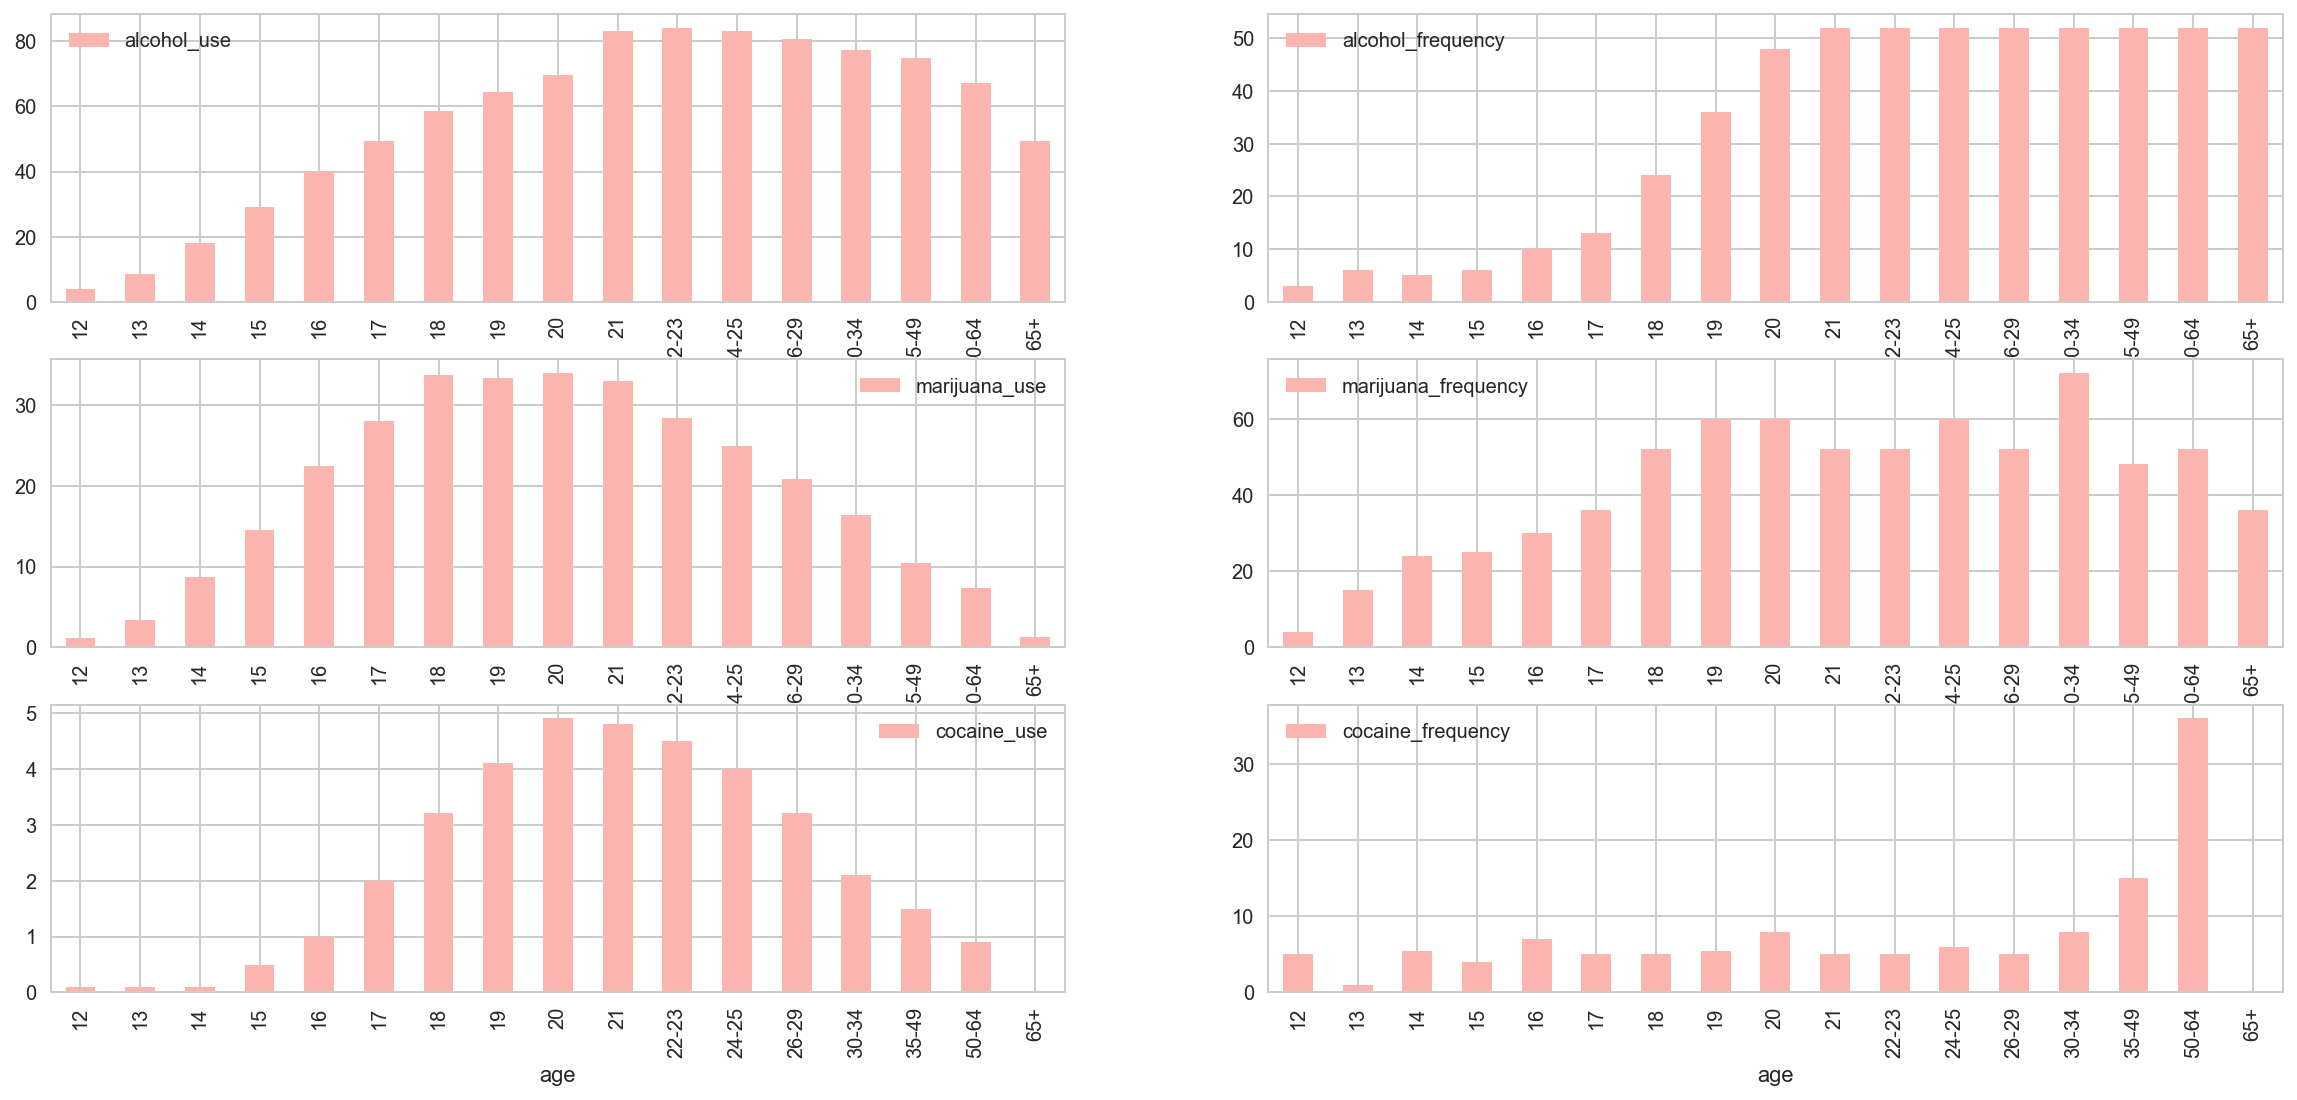

In [347]:
fig, axes = plt.subplots(3,2, figsize=(20,9))
drugs.plot(kind = 'bar', x='age', y='alcohol_use', colormap = 'Pastel1', ax=axes[0,0])
drugs.plot(kind = 'bar', x='age', y='alcohol_frequency', colormap = 'Pastel1', ax=axes[0,1])
drugs.plot(kind = 'bar', x='age', y='marijuana_use', colormap = 'Pastel1', ax=axes[1,0])
drugs.plot(kind = 'bar', x='age', y='marijuana_frequency',colormap = 'Pastel1', ax=axes[1,1])
drugs.plot(kind = 'bar', x='age', y='cocaine_use', colormap = 'Pastel1', ax=axes[2,0])
drugs.plot(kind = 'bar', x='age', y='cocaine_frequency', colormap = 'Pastel1', ax=axes[2,1])

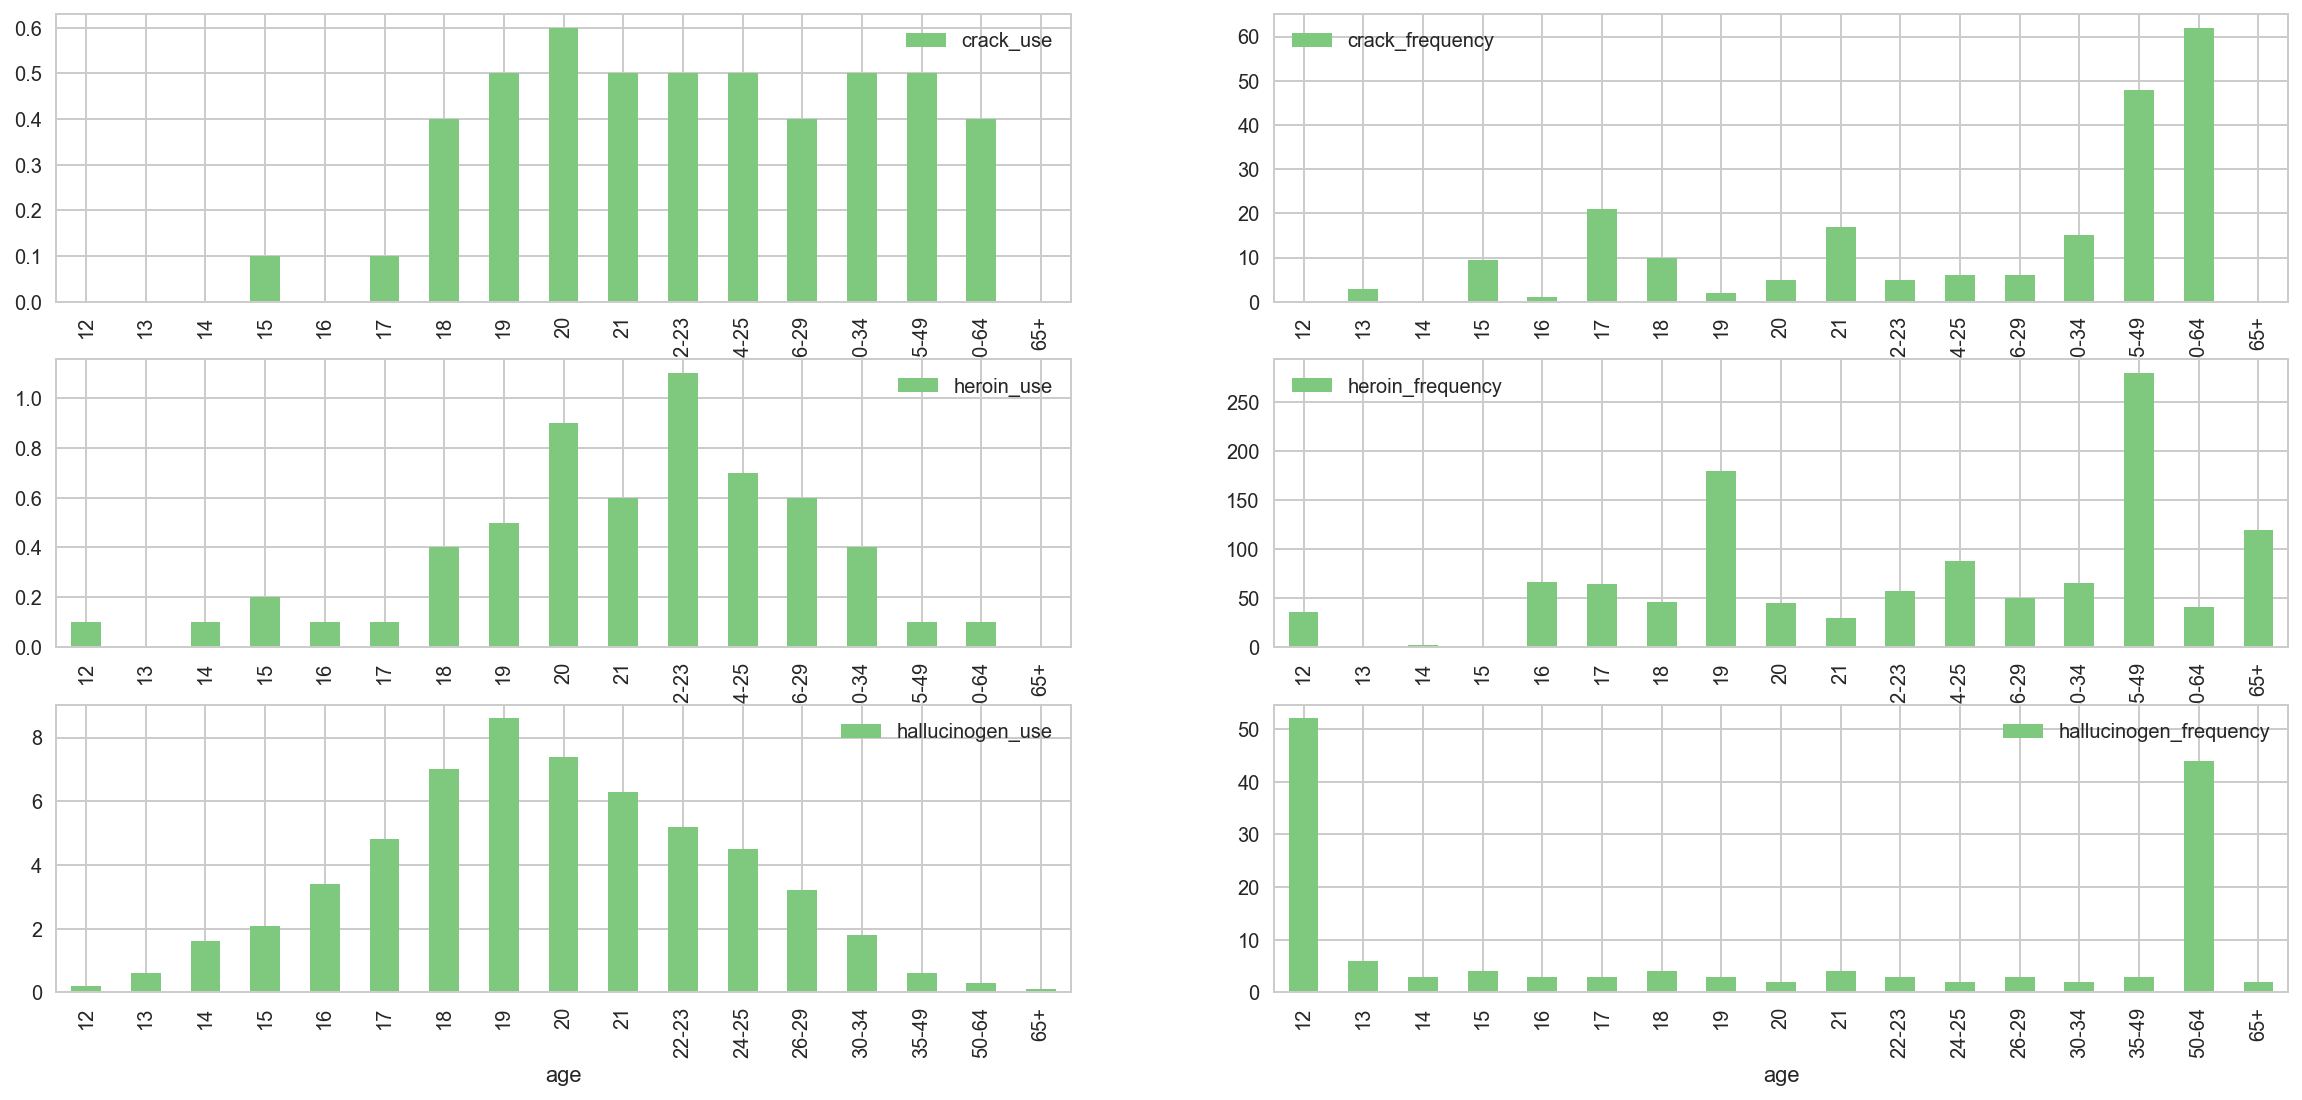

In [348]:
fig, axes = plt.subplots(3,2, figsize=(20,9))
drugs.plot(kind = 'bar', x='age', y='crack_use', colormap = 'Accent', ax=axes[0,0])
drugs.plot(kind = 'bar', x='age', y='crack_frequency', colormap = 'Accent', ax=axes[0,1])
drugs.plot(kind = 'bar', x='age', y='heroin_use', colormap = 'Accent', ax=axes[1,0])
drugs.plot(kind = 'bar', x='age', y='heroin_frequency', colormap = 'Accent', ax=axes[1,1])
drugs.plot(kind = 'bar', x='age', y='hallucinogen_use', colormap = 'Accent', ax=axes[2,0])
drugs.plot(kind = 'bar', x='age', y='hallucinogen_frequency', colormap = 'Accent', ax=axes[2,1])

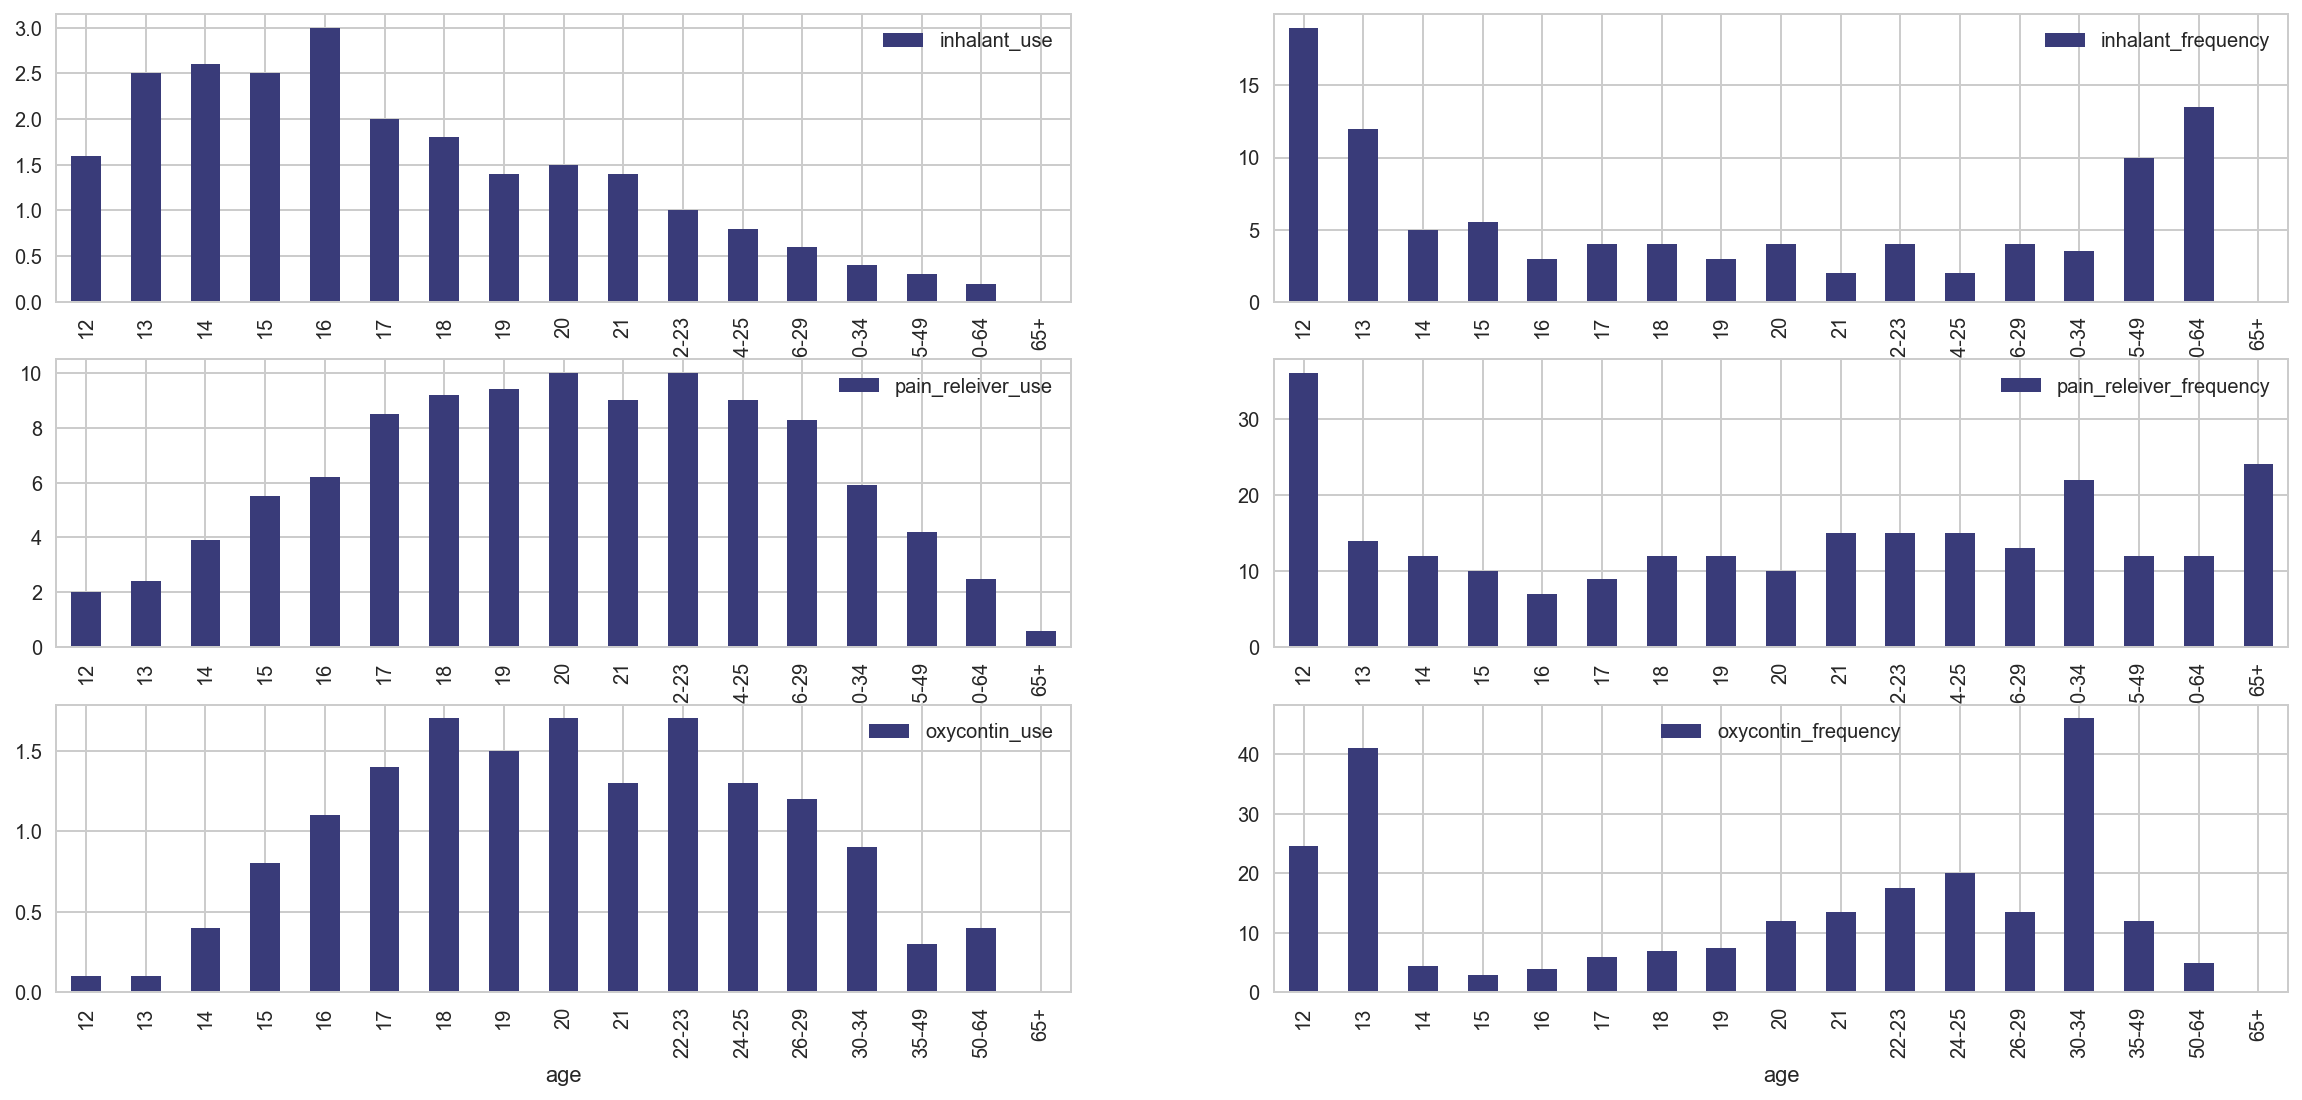

In [349]:
fig, axes = plt.subplots(3,2, figsize=(20,9))
drugs.plot(kind='bar', x='age', y='inhalant_use', colormap ='tab20b', ax=axes[0,0])
drugs.plot(kind='bar', x='age', y='inhalant_frequency', colormap ='tab20b', ax=axes[0,1])
drugs.plot(kind='bar', x='age', y='pain_releiver_use', colormap ='tab20b', ax=axes[1,0])
drugs.plot(kind='bar', x='age', y='pain_releiver_frequency', colormap ='tab20b', ax=axes[1,1])
drugs.plot(kind='bar', x='age', y='oxycontin_use', colormap ='tab20b', ax=axes[2,0])
drugs.plot(kind='bar', x='age', y='oxycontin_frequency', colormap ='tab20b', ax=axes[2,1])

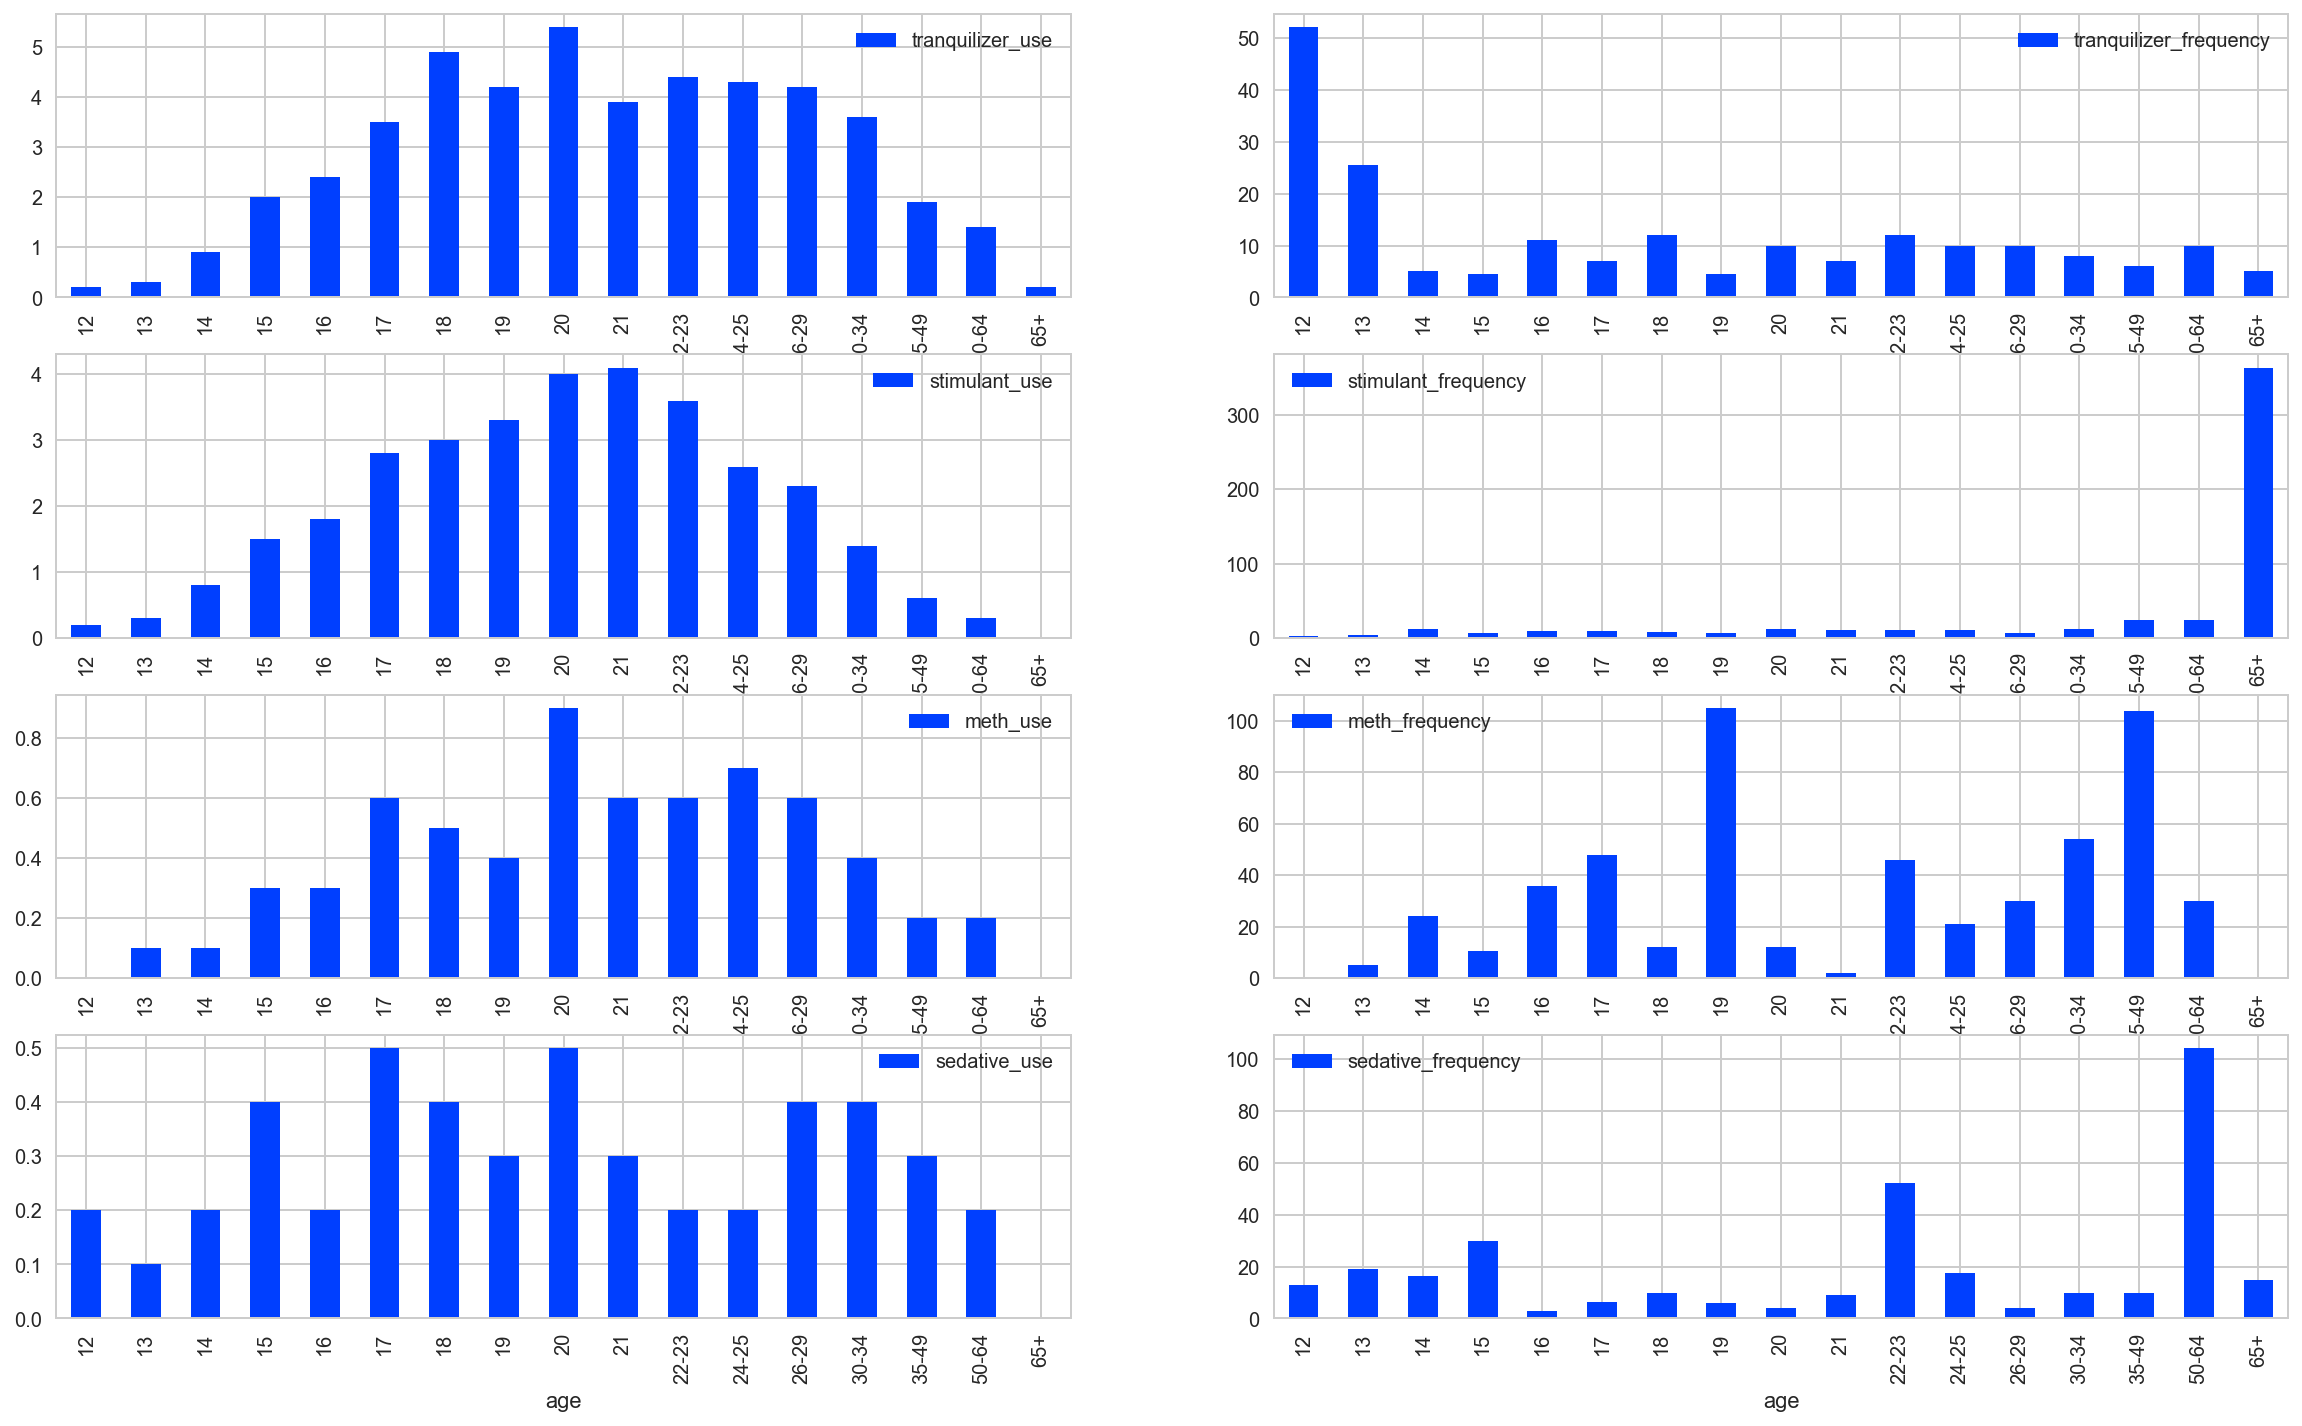

In [350]:
fig, axes = plt.subplots(4,2, figsize=(20,12))
drugs.plot(kind='bar', x='age', y='tranquilizer_use',ax=axes[0,0])
drugs.plot(kind='bar', x='age', y='tranquilizer_frequency',ax=axes[0,1])
drugs.plot(kind='bar', x='age', y='stimulant_use',ax=axes[1,0])
drugs.plot(kind='bar', x='age', y='stimulant_frequency',ax=axes[1,1])
drugs.plot(kind='bar', x='age', y='meth_use',ax=axes[2,0])
drugs.plot(kind='bar', x='age', y='meth_frequency',ax=axes[2,1])
drugs.plot(kind='bar', x='age', y='sedative_use',ax=axes[3,0])
drugs.plot(kind='bar', x='age', y='sedative_frequency',ax=axes[3,1])

**Comments:**

>The usage of drugs is highest among young adults from the ages of 18 to 20s.

>The frequency of drugs is higher towards the larger age groups.

**Comments:**
>Plotting stacked bar of drug use per age group

In [351]:
drugs.head()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [352]:
#df.T.plot.bar()
drugs_T = drugs.copy()

In [353]:
drugs_T.head(2)

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


In [354]:
#Drop the n column
#Change columsn to age
#Separate out the freq and use

In [355]:
drugs_T.drop('n', axis = 1, inplace=True)

In [356]:
drugs_T.set_index('age', inplace=True)
drugs_T.head()

,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
age,,,,,,,,,,,,,,,,,,,,,,,,,,
12,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
13,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [357]:
#Separate out the use and freq into separate dataframes
to_drop_freq = [i for i in drugs_T.columns if i.find('frequency') != -1]
to_drop_use = [i for i in drugs_T.columns if i.find('use') != -1]
drugs_T_use = drugs_T.drop(to_drop_freq, axis=1)
drugs_T_freq = drugs_T.drop(to_drop_use, axis=1)

In [358]:
drugs_T_freq.head(2)

,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_releiver_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
age,,,,,,,,,,,,,
12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0


In [359]:
drugs_T_use.head(2)

,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,hallucinogen_use,inhalant_use,pain_releiver_use,oxycontin_use,tranquilizer_use,stimulant_use,meth_use,sedative_use
age,,,,,,,,,,,,,
12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1


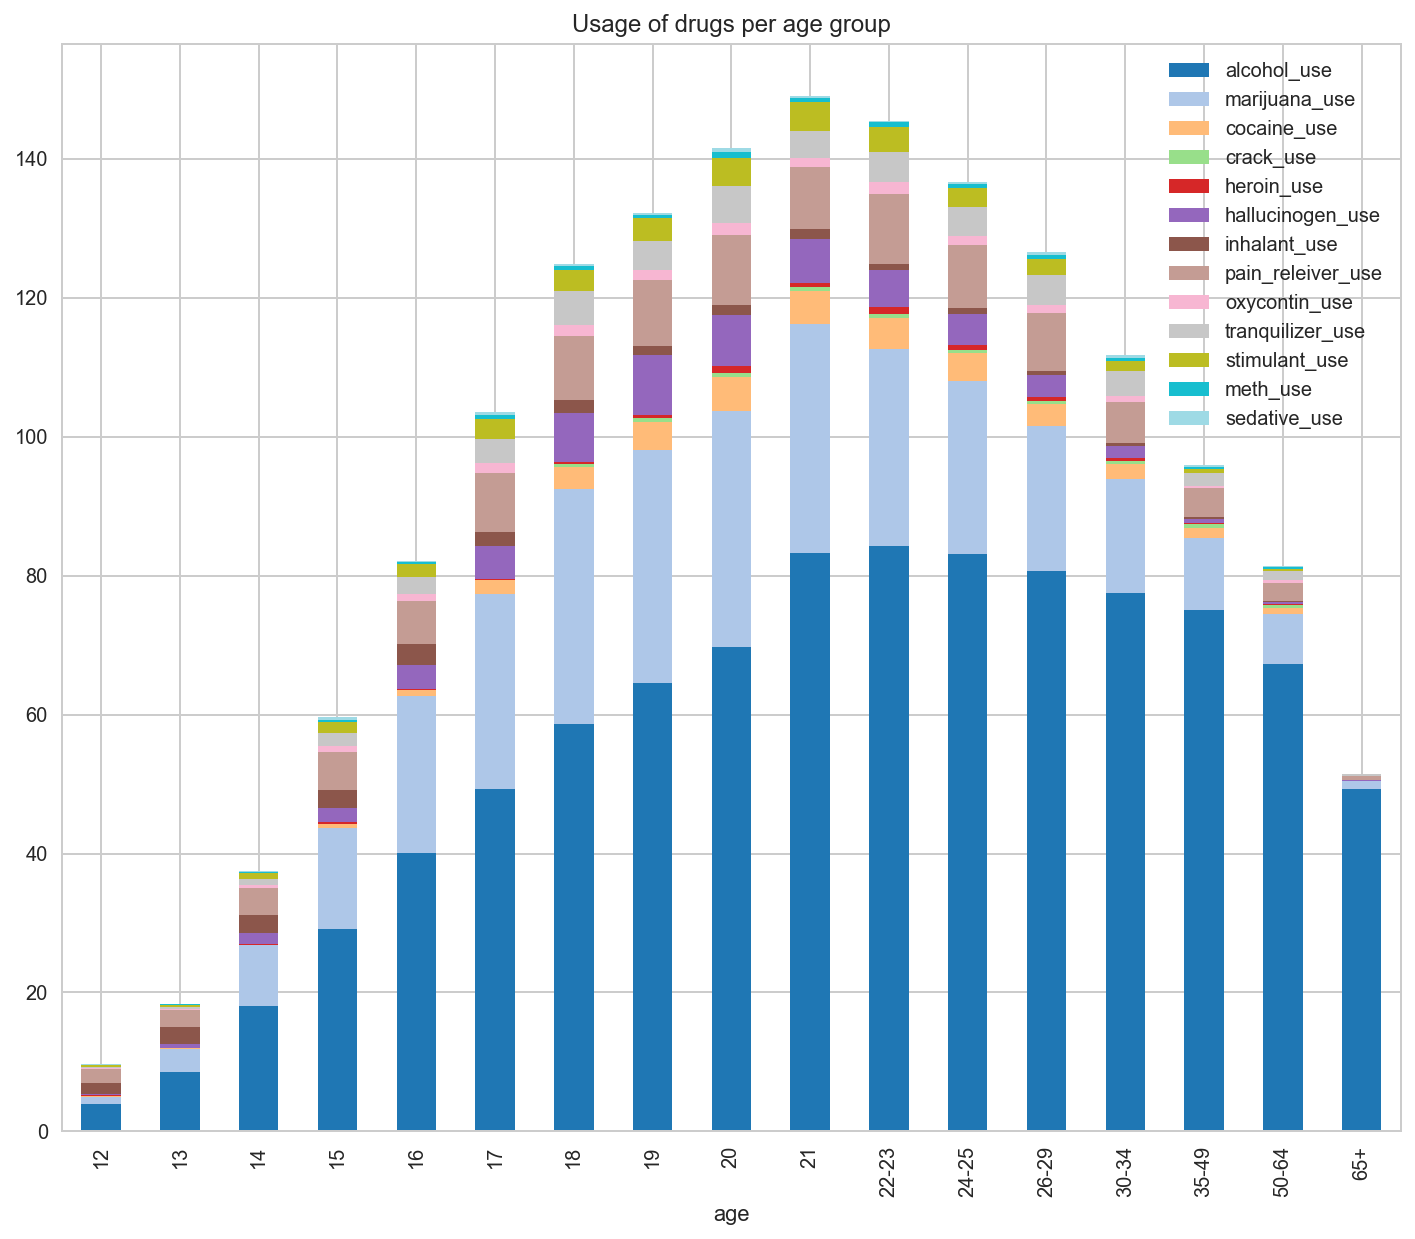

In [360]:
drugs_T_use.plot(kind='bar', figsize= (12,10), stacked = True, colormap = 'tab20', title = 'Usage of drugs per age group')

**Comments:**

>Alcohol is the drug that is used the most across all age groups, followed by marijuana.

>Drug usage is the highest among young adults from the ages of 18 till 29.

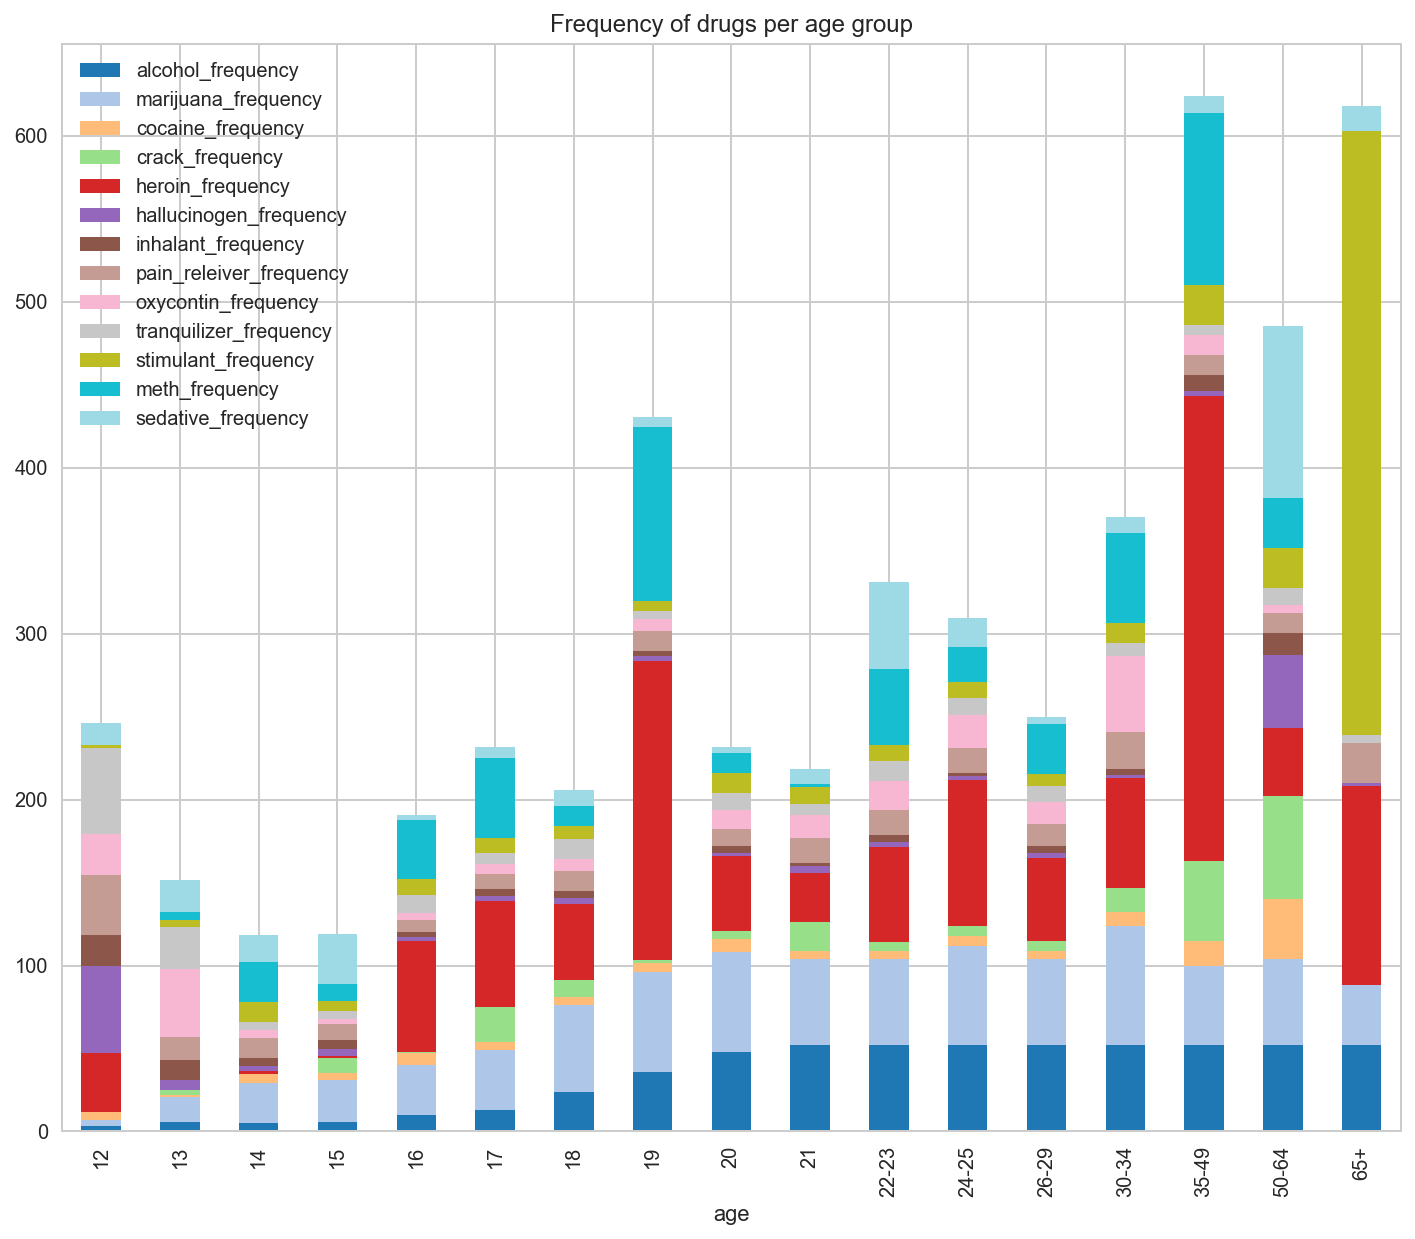

In [361]:
drugs_T_freq.plot(kind='bar', figsize= (12,10), stacked = True, colormap = 'tab20', title = 'Frequency of drugs per age group')

**Comments:**
> Heroin is the most frequent drug among drug users across most age groups.

> Stimulant is the most frequent drug in the age group of 65+ years old.

>Drug frequency seems to be the highest among the age group of 35-65+. However, one thing to note is that the ages from 22 onwards are grouped into categories, while those below an age of 22 are not grouped into categories. Hence, if the ages from 22 onwards were separated into single ages values then the frequency of drugs for each age could be lower or different. In that case, the true cause of concern would be the age group of 19 year olds since their drug frequency is high compared to the rest.

**Comments:**
>Looking at the correlation between variables

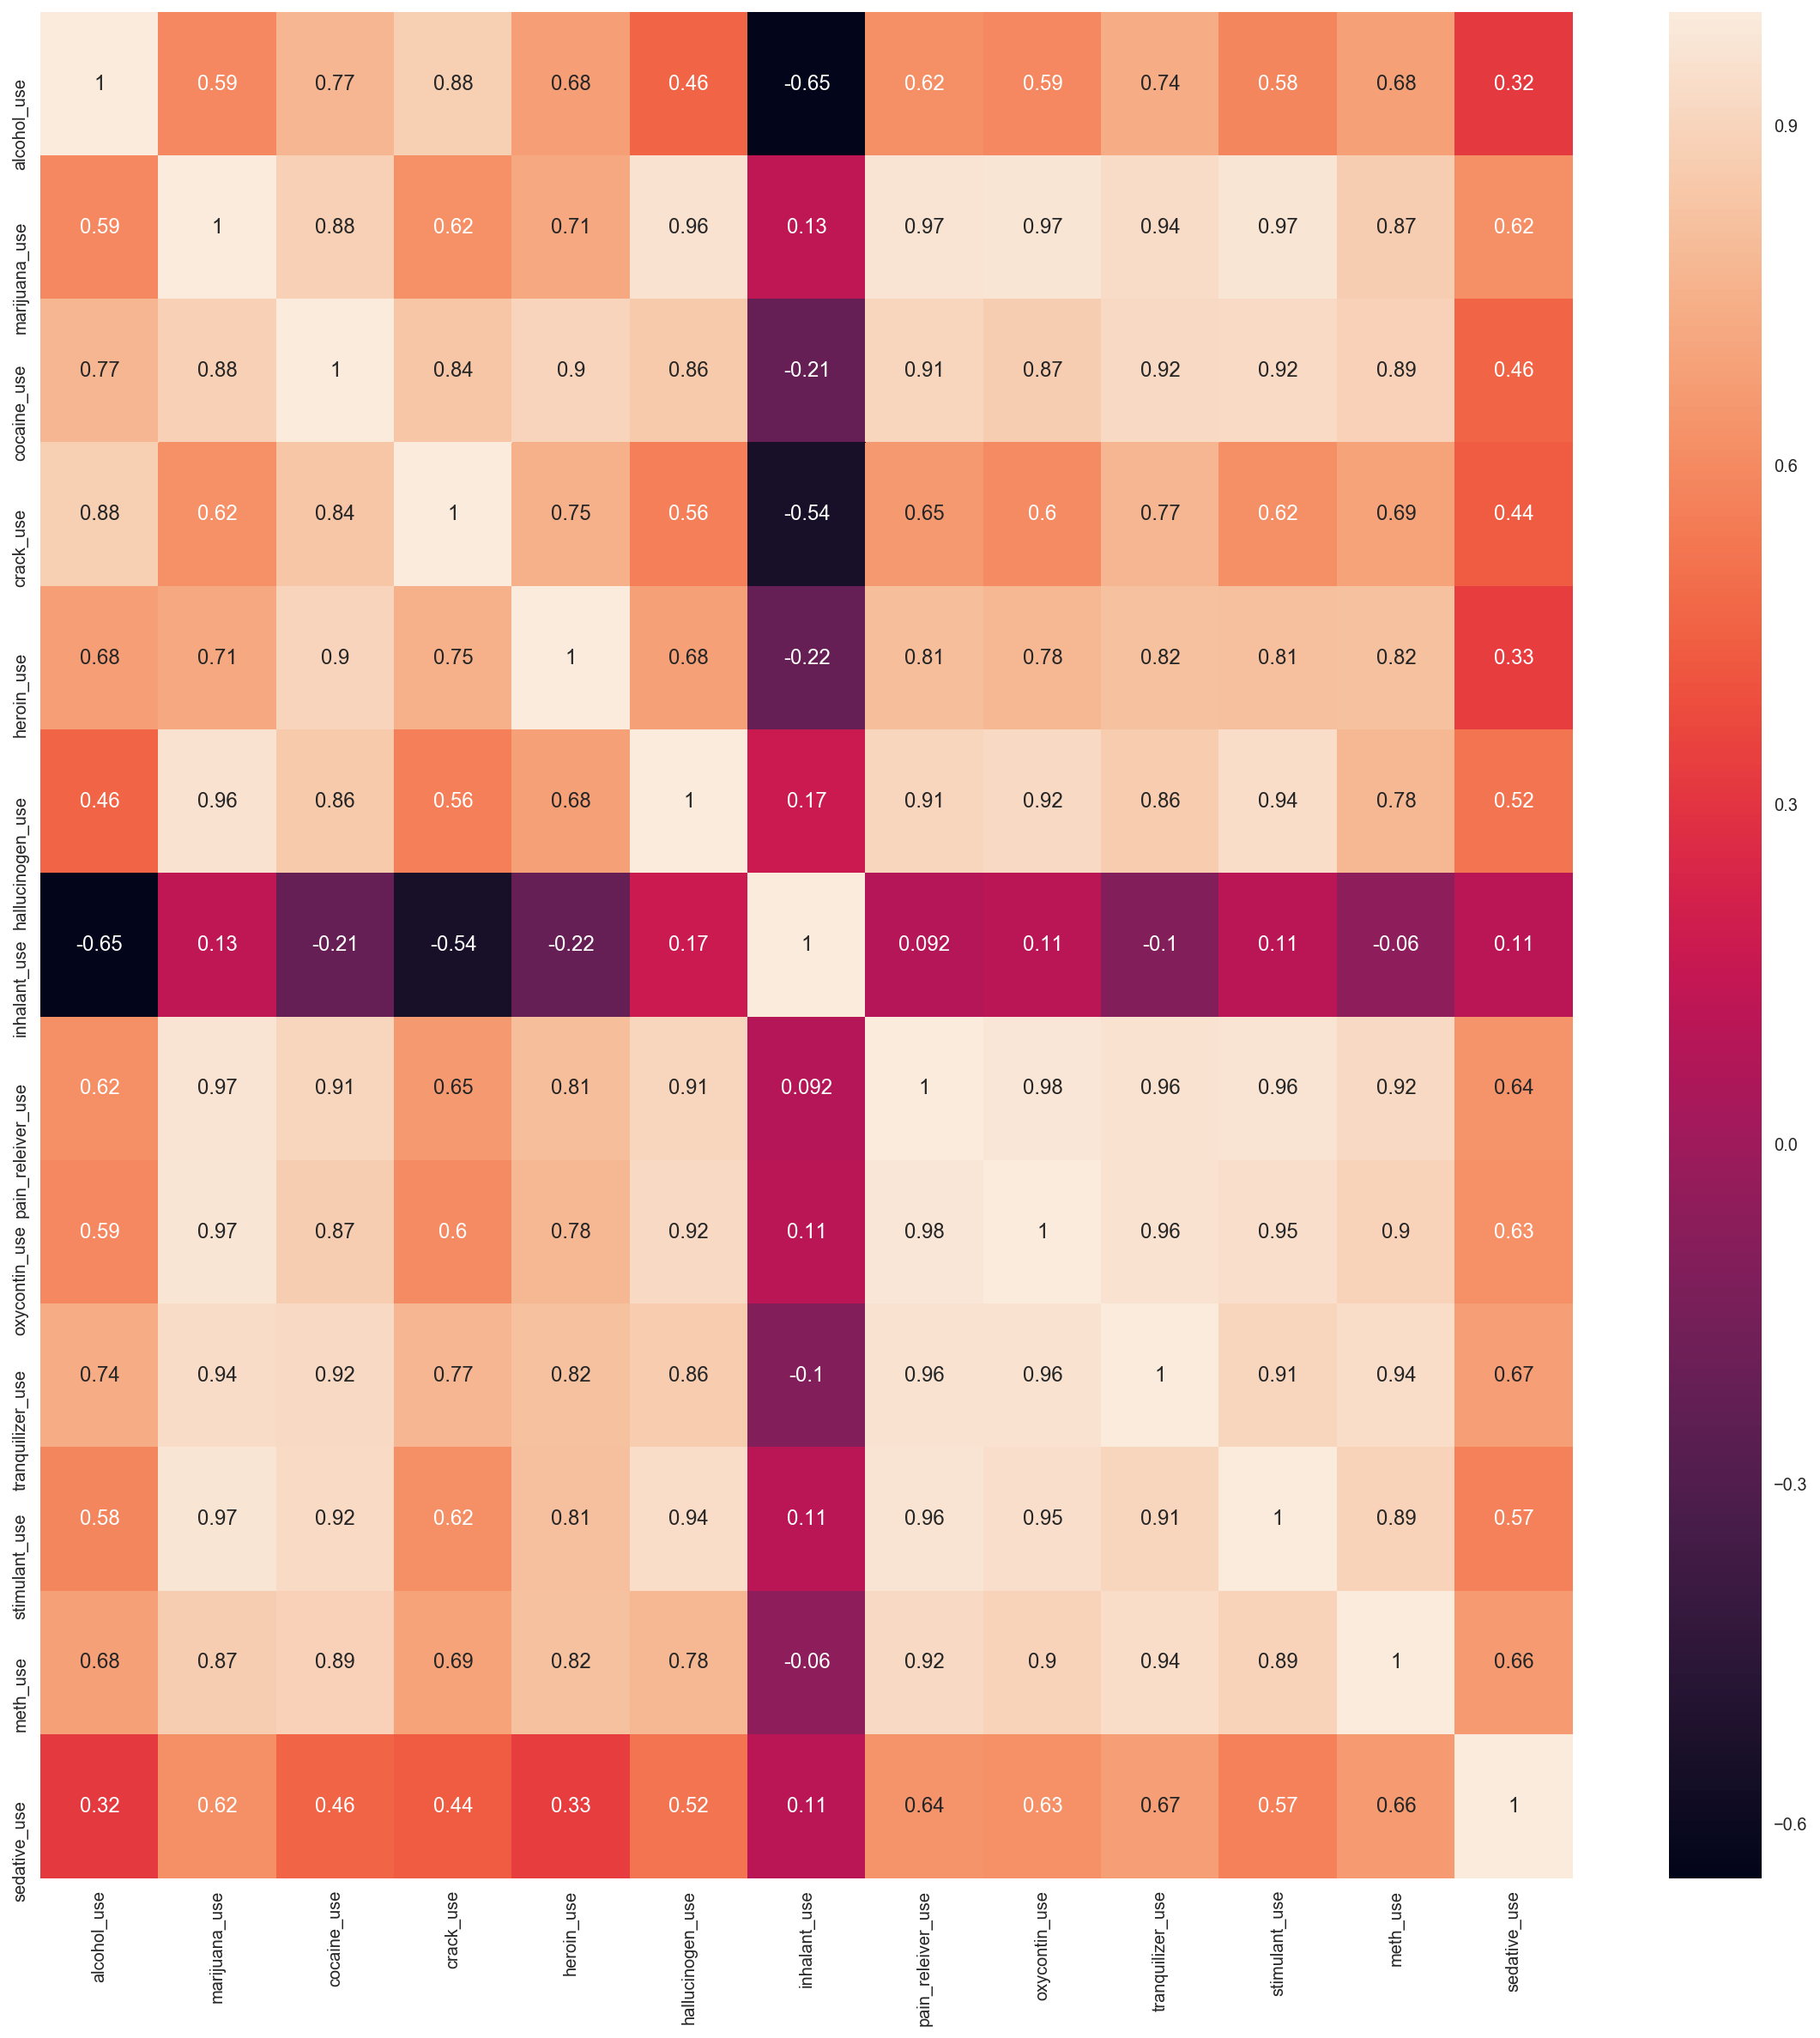

In [362]:
#Heatmap for drug use
plt.figure(figsize=(20,20))
sns.heatmap(drugs_T_use.corr(), annot=True)

**Comments:**
>In general, the usage of one drug is strongly correlated with the usage of other drugs, with the exception of inhalant_use. Inhalant use is weakly correlated with other drugs usage.

>After ihalants, sedative use has the next weakest correlation with the usage of other drugs.

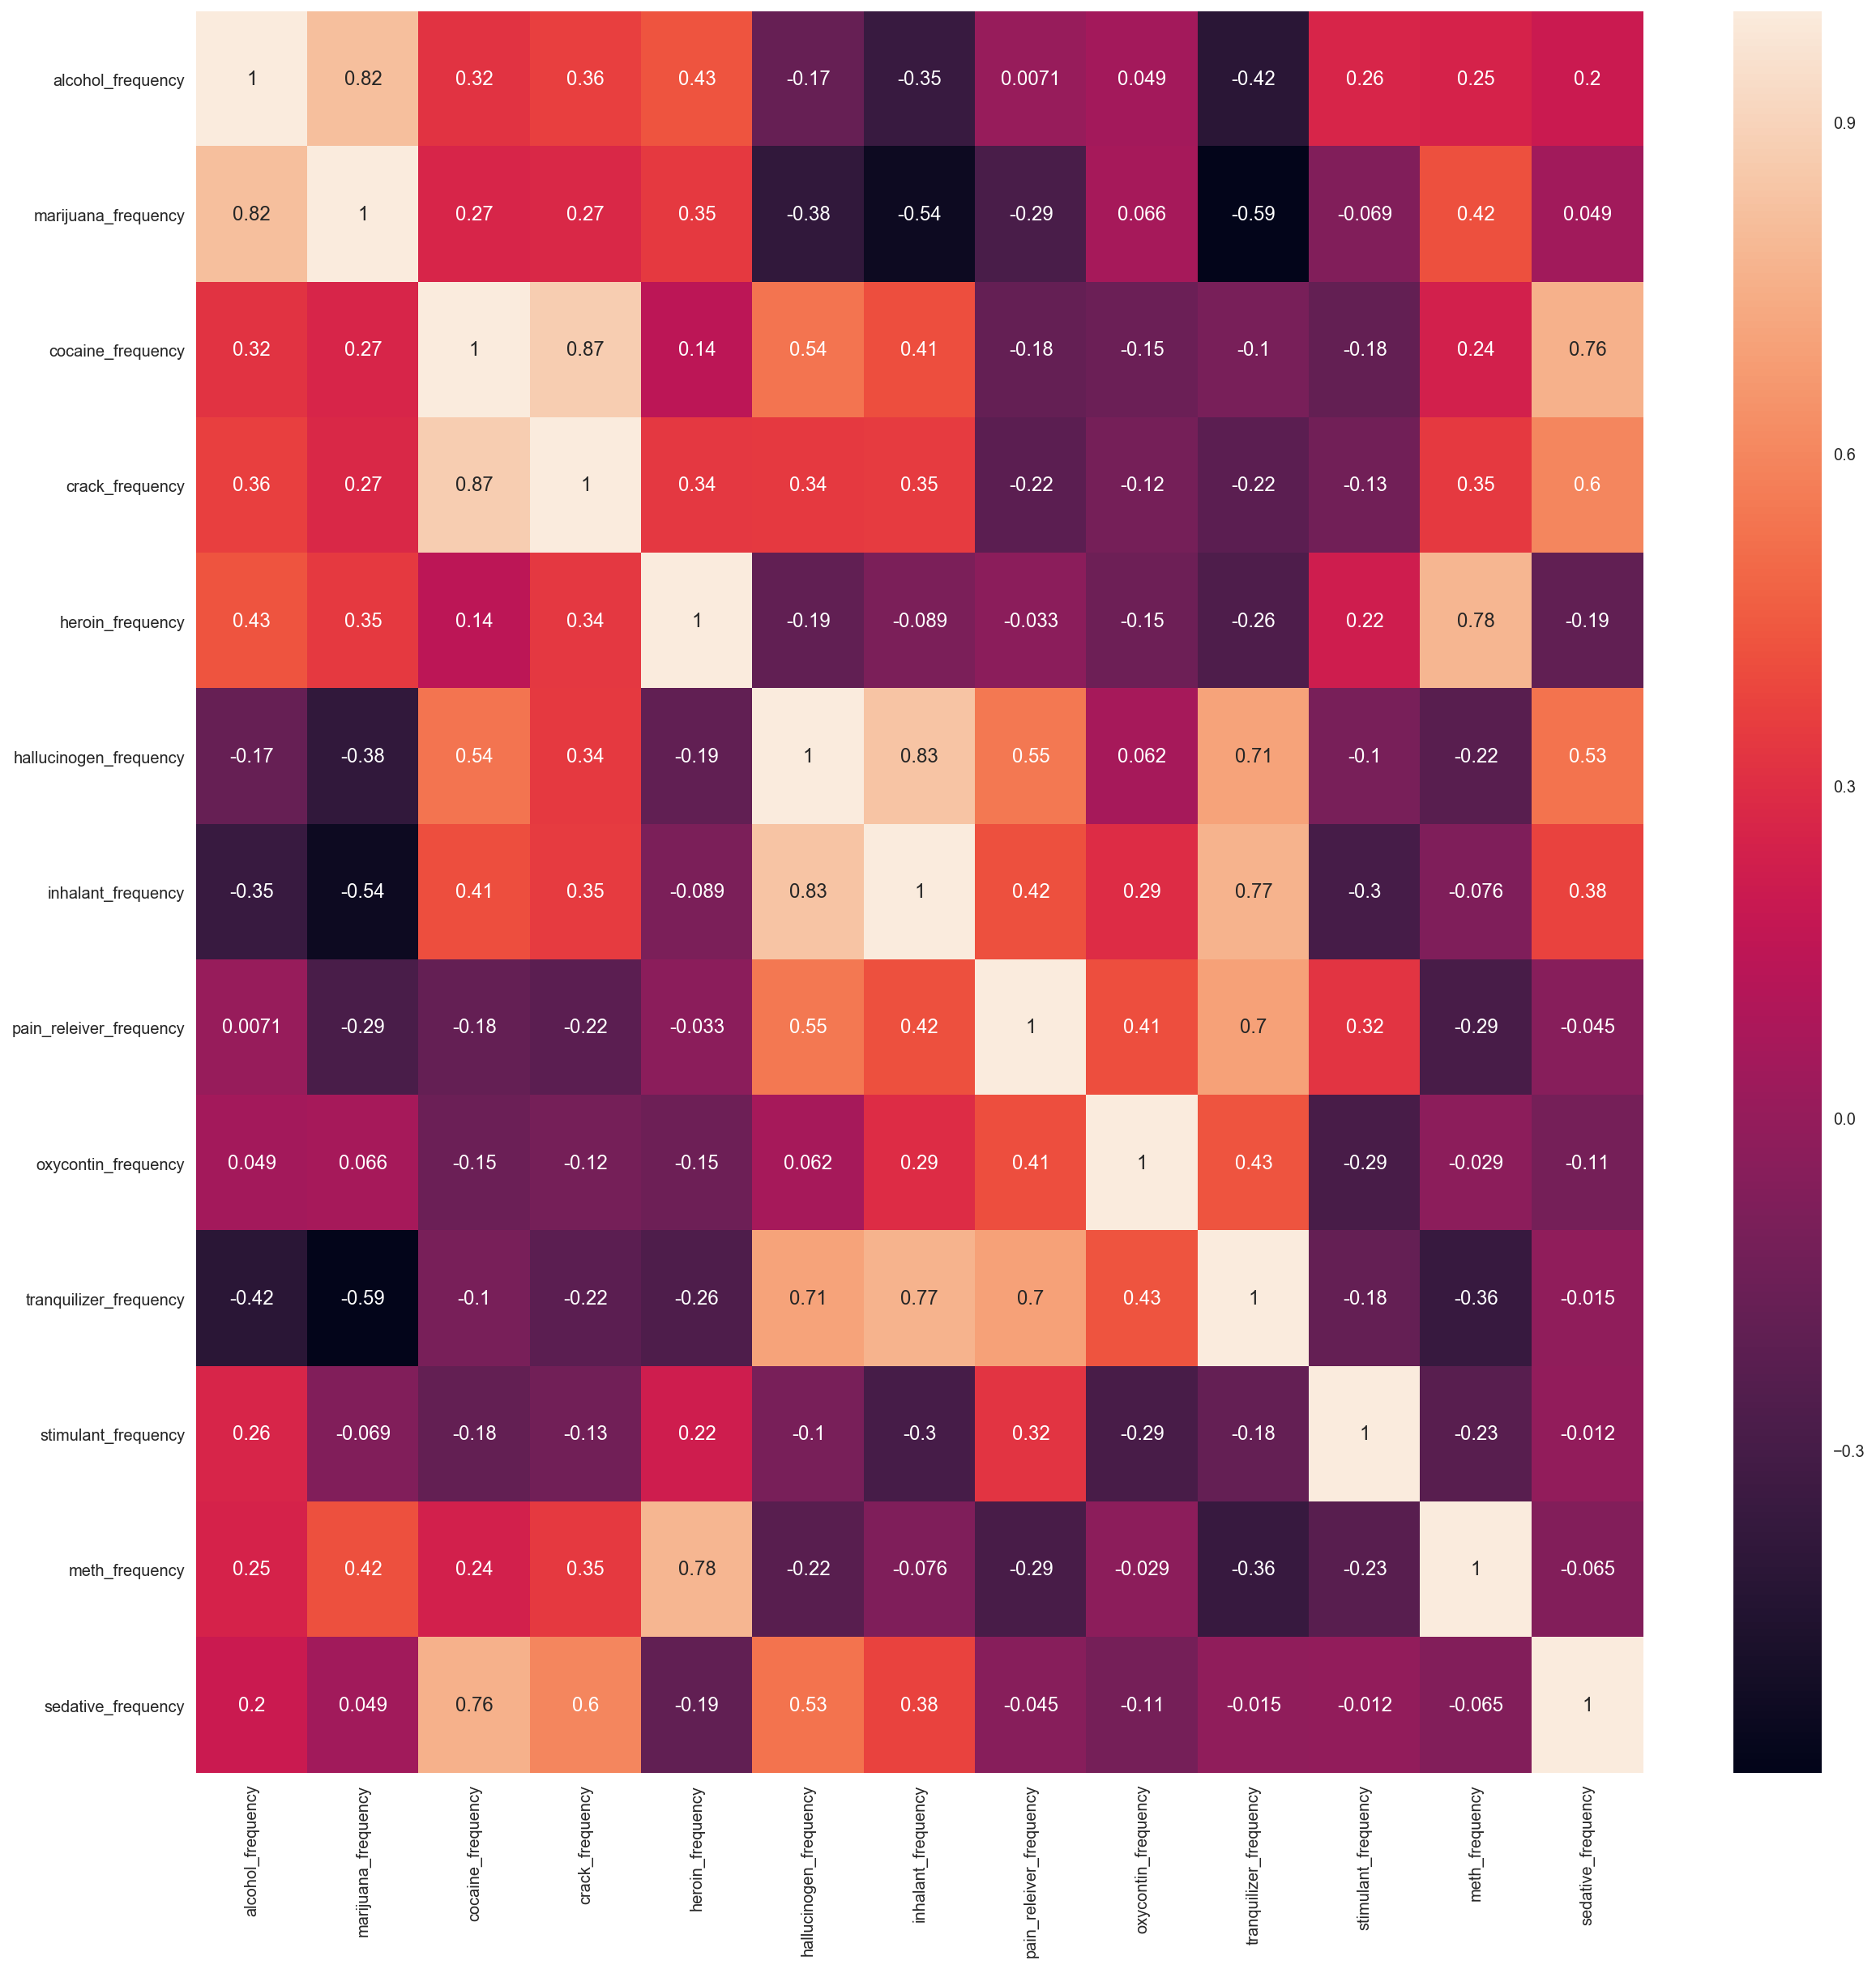

In [363]:
#Heatmap for drug use
plt.figure(figsize=(20,20))
sns.heatmap(drugs_T_freq.corr(), annot=True)

**Comments:**
> In general, frequency of one drug is not strongly correlated with frequency of another drug with some exceptions.
> By setting the cutoff for high correlation, alcohol frequency is highly correlated with marijuana frequency, crack freqeuncy is highly correlated with cocaine frequency, and inhalant frequency is highly correlated with hallucinogen frequency.

In [364]:
#Correlation matrix for drug use across age
drugs_T_use.corr()

,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,hallucinogen_use,inhalant_use,pain_releiver_use,oxycontin_use,tranquilizer_use,stimulant_use,meth_use,sedative_use
alcohol_use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana_use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine_use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack_use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin_use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen_use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant_use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain_releiver_use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin_use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer_use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


In [365]:
#Correlation matrix for drug frequency across age
drugs_T_freq.corr()

,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_releiver_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
alcohol_frequency,1.000000,0.818769,0.317172,0.364267,0.432405,-0.174622,-0.351677,0.007087,0.049388,-0.415026,0.260304,0.252246,0.201423
marijuana_frequency,0.818769,1.000000,0.265193,0.273167,0.346001,-0.380430,-0.537857,-0.285292,0.066200,-0.591449,-0.069454,0.417947,0.048777
cocaine_frequency,0.317172,0.265193,1.000000,0.872260,0.143095,0.537645,0.413751,-0.179859,-0.154491,-0.103142,-0.183692,0.240660,0.761572
crack_frequency,0.364267,0.273167,0.872260,1.000000,0.335815,0.341344,0.350775,-0.218321,-0.115546,-0.215342,-0.125405,0.346559,0.602101
heroin_frequency,0.432405,0.346001,0.143095,0.335815,1.000000,-0.188085,-0.089068,-0.033484,-0.148807,-0.264485,0.218212,0.782122,-0.191638
hallucinogen_frequency,-0.174622,-0.380430,0.537645,0.341344,-0.188085,1.000000,0.834993,0.547363,0.061814,0.705734,-0.103980,-0.224738,0.533095
inhalant_frequency,-0.351677,-0.537857,0.413751,0.350775,-0.089068,0.834993,1.000000,0.420682,0.291686,0.766372,-0.296318,-0.075928,0.376364
pain_releiver_frequency,0.007087,-0.285292,-0.179859,-0.218321,-0.033484,0.547363,0.420682,1.000000,0.410163,0.699282,0.324717,-0.291527,-0.045213
oxycontin_frequency,0.049388,0.066200,-0.154491,-0.115546,-0.148807,0.061814,0.291686,0.410163,1.000000,0.433366,-0.292730,-0.028618,-0.113600
tranquilizer_frequency,-0.415026,-0.591449,-0.103142,-0.215342,-0.264485,0.705734,0.766372,0.699282,0.433366,1.000000,-0.180415,-0.360901,-0.014524


**Report:**
> Drug use is defined as the percentage of an age/age group that consumes the drug. Drug frequency is defined as the median number of times the members of the age group used the drug in the past year.

> In general, the usage of drugs is the highest among the ages of 18-29. The usage of one drug is highly correlated with the usage of other drugs, with the exception of inhalant use which is weakly correlated with usage of other drugs. Alcohol and marijuana were the most used drugs across all drugs.

> The frequeny of drugs is the highest among 19-year olds. In general, the frequency of one drug is not highly correlated with the frequency of another drug with some exceptions. High correlation is defined as as value of 0.8 or higher. Alcohol frequency is highly correlated with marijuana frequency, crack freqeuncy is highly correlated with cocaine frequency, and inhalant frequency is highly correlated with hallucinogen frequency.

> Hence, the initiative to counter drug abuse should focus on reducing drug usage among teenagers and young adults in their twenties. The use and frequency of marijuana should be controlled.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**Comments:**

>The population was separated into 2 groups, young adults in their 20s versus older adults in age group 50-65+. Chi-square test of independence was used to test if the frequency of stimulant drugs is independent of age group.

**Hypothesis:**

>Using Chi-square test of independence

>Null hypothesis: Frequency of stimulant drugs is independent of age group (20s versus 50-65+)

>Alternative hypothesis: Frequency of stimulant drugs is not independent of age group (20s versus 50-65+)

In [366]:
#Initial DataFrame
drugs

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [367]:
#Drop rows to create a dataframe containing the ages 20s and 50-65+
drugs1 = drugs.drop([0,1,2,3,4,5,6,7,13,14])
drugs1

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,1.1,57.5,5.2,3.0,1.0,4.0,10.0,15.0,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,0.7,88.0,4.5,2.0,0.8,2.0,9.0,15.0,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,50.0,3.2,3.0,0.6,4.0,8.3,13.0,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,0.0,0.0,0.0,0.0,120.0,0.1,2.0,0.0,0.0,0.6,24.0,0.0,0.0,0.2,5.0,0.0,364.0,0.0,0.0,0.0,15.0


In [368]:
#Hypothesis is only interested in drug frequency and not drug use. 
#Hence drop columns corresponding to drug use.
import string
to_drop = [i for i in drugs1.columns if i.find('use') != -1]
drugs1 = drugs1.drop(to_drop,axis=1)
drugs1.head(2)

,age,n,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_releiver_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
8,20,2271,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,2354,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


In [369]:
#Set age column as index
drugs1.set_index('age', inplace=True)
drugs1.head(2)

,n,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_releiver_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
age,,,,,,,,,,,,,,
20,2271,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
21,2354,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


In [370]:
# Making a dictionary of the count per drug frequency per age group
d = {}
for i in drugs1.columns:
    if i=='n': continue
    d[i] = drugs1[i]*drugs1['n']/100
print d

{'stimulant_frequency': age
20       272.52 
21       235.40 
22-23    470.70 
24-25    459.10 
26-29    183.96 
50-64    941.52 
65+      8910.72
dtype: float64, 'oxycontin_frequency': age
20       272.520
21       317.790
22-23    823.725
24-25    918.200
26-29    354.780
50-64    196.150
65+      0.000  
dtype: float64, 'heroin_frequency': age
20       1021.950
21       706.200 
22-23    2706.525
24-25    4040.080
26-29    1314.000
50-64    1608.430
65+      2937.600
dtype: float64, 'inhalant_frequency': age
20       90.840 
21       47.080 
22-23    188.280
24-25    91.820 
26-29    105.120
50-64    529.605
65+      0.000  
dtype: float64, 'alcohol_frequency': age
20       1090.08
21       1224.08
22-23    2447.64
24-25    2387.32
26-29    1366.56
50-64    2039.96
65+      1272.96
dtype: float64, 'meth_frequency': age
20       272.52 
21       47.08  
22-23    2165.22
24-25    964.11 
26-29    788.40 
50-64    1176.90
65+      0.00   
dtype: float64, 'marijuana_frequency': age
20  

In [371]:
#Making a dataframe containing the count of each drug frequency
drugs_count = pd.DataFrame(d)
drugs_count

,alcohol_frequency,cocaine_frequency,crack_frequency,hallucinogen_frequency,heroin_frequency,inhalant_frequency,marijuana_frequency,meth_frequency,oxycontin_frequency,pain_releiver_frequency,sedative_frequency,stimulant_frequency,tranquilizer_frequency
age,,,,,,,,,,,,,
20,1090.08,181.68,113.55,45.42,1021.950,90.840,1362.60,272.52,272.520,227.10,90.840,272.52,227.10
21,1224.08,117.70,400.18,94.16,706.200,47.080,1224.08,47.08,317.790,353.10,211.860,235.40,164.78
22-23,2447.64,235.35,235.35,141.21,2706.525,188.280,2447.64,2165.22,823.725,706.05,2447.640,470.70,564.84
24-25,2387.32,275.46,275.46,91.82,4040.080,91.820,2754.60,964.11,918.200,688.65,803.425,459.10,459.10
26-29,1366.56,131.40,157.68,78.84,1314.000,105.120,1366.56,788.40,354.780,341.64,105.120,183.96,262.80
50-64,2039.96,1412.28,2432.26,1726.12,1608.430,529.605,2039.96,1176.90,196.150,470.76,4079.920,941.52,392.30
65+,1272.96,0.00,0.00,48.96,2937.600,0.000,881.28,0.00,0.000,587.52,367.200,8910.72,122.40


The drugs were classified into distinct groups.
 >**Drug classifications:**

>depressant = alcohol, sedative, tranquilizer

>stimulants = cocaine, crack, meth, stimulant

>hallucinogen = hallucinogen, marijuana

>opiods = heroin, oxycontin, pain_reliever

>not_sure/multiple categories = inhalant

In [372]:
#Chi-square test of independence to check if the frequency of stimulants across 2 age groups is independent

In [373]:
#Defining the drugs
stimulants =['cocaine_frequency', 'crack_frequency', 'meth_frequency', 'stimulant_frequency']

In [374]:
#Making a dataframe consisting of the stimulant drugs only
stimulants_drugs = pd.DataFrame(data=np.zeros((7,4)),columns=stimulants)
stimulants_drugs['age'] = ['20', '21', '22-23', '24-25', '26-29', '50-64', '65+']
for i in drugs_count.columns:
    if i in stimulants:
        stimulants_drugs[i] = drugs_count[i].values

In [375]:
stimulants_drugs.set_index('age', inplace=True)
stimulants_drugs['n'] = [2271, 2354, 4707, 4591, 2628, 3923, 2448]
stimulants_drugs

,cocaine_frequency,crack_frequency,meth_frequency,stimulant_frequency,n
age,,,,,
20,181.68,113.55,272.52,272.52,2271
21,117.70,400.18,47.08,235.40,2354
22-23,235.35,235.35,2165.22,470.70,4707
24-25,275.46,275.46,964.11,459.10,4591
26-29,131.40,157.68,788.40,183.96,2628
50-64,1412.28,2432.26,1176.90,941.52,3923
65+,0.00,0.00,0.00,8910.72,2448


In [376]:
stimulants_drugs.iloc[:,0]

age
20       181.68 
21       117.70 
22-23    235.35 
24-25    275.46 
26-29    131.40 
50-64    1412.28
65+      0.00   
Name: cocaine_frequency, dtype: float64

In [377]:
#Adding stimulant non-drug frequency
names = ['cocaine_non_freq', 'crack_non_freq', 'meth_non_freq', 'stimulant_non_freq']
j = -1
for i in names:
    j += 1
    stimulants_drugs[i] = stimulants_drugs['n'] - stimulants_drugs.iloc[:,j]

In [378]:
stimulants_drugs

,cocaine_frequency,crack_frequency,meth_frequency,stimulant_frequency,n,cocaine_non_freq,crack_non_freq,meth_non_freq,stimulant_non_freq
age,,,,,,,,,
20,181.68,113.55,272.52,272.52,2271,2089.32,2157.45,1998.48,1998.48
21,117.70,400.18,47.08,235.40,2354,2236.30,1953.82,2306.92,2118.60
22-23,235.35,235.35,2165.22,470.70,4707,4471.65,4471.65,2541.78,4236.30
24-25,275.46,275.46,964.11,459.10,4591,4315.54,4315.54,3626.89,4131.90
26-29,131.40,157.68,788.40,183.96,2628,2496.60,2470.32,1839.60,2444.04
50-64,1412.28,2432.26,1176.90,941.52,3923,2510.72,1490.74,2746.10,2981.48
65+,0.00,0.00,0.00,8910.72,2448,2448.00,2448.00,2448.00,-6462.72


In [379]:
#Getting the total frequency of stimulants use per age group
stimulants_drugs_count = (stimulants_drugs.iloc[:,0:4]).sum(axis=1)
print stimulants_drugs_count

age
20       840.27 
21       800.36 
22-23    3106.62
24-25    1974.13
26-29    1261.44
50-64    5962.96
65+      8910.72
dtype: float64


In [380]:
#Getting the total frequency of stimulants use per age group
stimulants_drugs_ncount = (stimulants_drugs.iloc[:,5:]).sum(axis=1)
print stimulants_drugs_ncount

age
20       8243.73 
21       8615.64 
22-23    15721.38
24-25    16389.87
26-29    9250.56 
50-64    9729.04 
65+      881.28  
dtype: float64


In [381]:
#Getting the observed count of stimulant drugs frequency of adults in their twenties
stimulants_twenties = stimulants_drugs_count[0:5].sum()
print "Frequency of stimulants of adults in their twenties:", stimulants_twenties

Frequency of stimulants of adults in their twenties: 7982.82


In [382]:
#Getting the observed count of stimulant drugs frequency of adults aged 50-65+
stimulants_not_twenties = stimulants_drugs_count[5:].sum()
print "Frequency of stimulants of adults aged 50-65+:", stimulants_not_twenties

Frequency of stimulants of adults aged 50-65+: 14873.68


In [383]:
#Getting the observed count of non-stimulant drugs frequency of adults in their twenties
nstimulants_twenties =stimulants_drugs_ncount[0:5].sum()
print "Non-frequency of stimulants of adults in their twenties:", nstimulants_twenties

Non-frequency of stimulants of adults in their twenties: 58221.18


In [384]:
#Getting the observed count of non-stimulant drugs frequency of adults aged 50-65+
nstimulants_not_twenties = stimulants_drugs_ncount[5:].sum()
print "Non-frequency of stimulants of adults aged 50-65+:", nstimulants_not_twenties

Non-frequency of stimulants of adults aged 50-65+: 10610.32


In [385]:
#Chi square test of independence
table = np.array([[stimulants_twenties, nstimulants_not_twenties],
                  [nstimulants_twenties, nstimulants_not_twenties]])
results = stats.chi2_contingency(table)
chi2 = results[0]
pvalue = results[1]
print "chi-square value:", chi2
print "p-value:", pvalue

chi-square value: 13813.6297593
p-value: 0.0


**Comments:**
>Since p-value=0.0<0.05, we can reject the null hypothesis. Hence, the use of stimulants is dependent on age (age 20s vs 50-65+)

**Report**

> Chi-square test of independence conducted to check if the usage of stimulants drugs is independent of age group (age 20s vs age age 50-65+)

> Null hypothesis: Stimulant drug use is independent of age group (age 20s vs age 50-65+)
Alternative hypothesis: Stimulant drug use is not independent of age group (age 20s vs age 50-65+)

> Chi-square test gave a p-value of 0.0<0.05, hence reject the null hypothesis of independence.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [386]:
#Dropping the variable Rate
sat_df3 = sat_df2.drop('Rate', axis = 1)
sat_df3.head()

,State,Verbal,Math
0,CT,509,510
1,NJ,499,513
2,MA,511,515
3,NY,495,505
4,NH,520,516


In [387]:
#Making a dataframe with just the Verbal and Math scores
Verbal_Math = sat_df3[['Verbal', 'Math']]

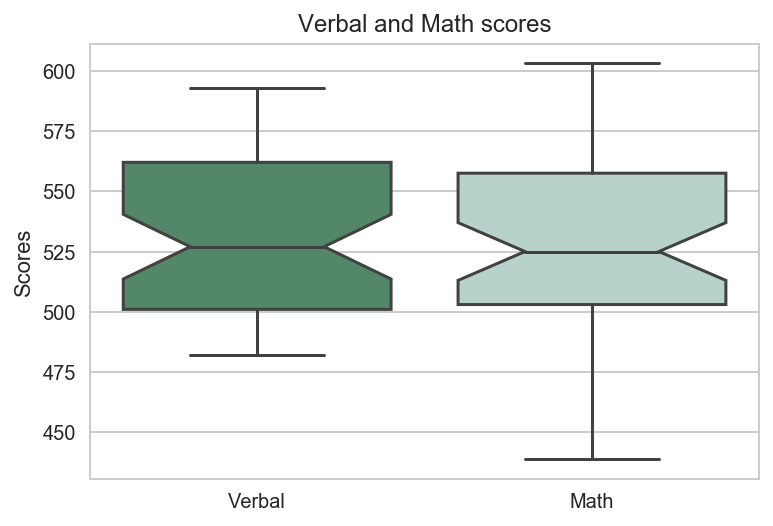

In [388]:
#Visualising to see if there are outliers in the variables Verbal and Math
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(data = Verbal_Math, orient = 'v', fliersize=8, linewidth=1.5, notch=True, saturation=0.5, palette='BuGn_r', ax=ax)
ax.set_ylabel('Scores')
ax.set_title('Verbal and Math scores')
plt.show()

**Comments:**
>Outliers will be defined as values that are 1.5*IQR, where IQR refers to interquartile range.

>Based on the boxplot above, there does not seem to be any outliers.

In [389]:
Verbal_Math.describe()

,Verbal,Math
count,51.000000,51.000000
mean,532.529412,531.843137
std,33.360667,36.287393
min,482.000000,439.000000
25%,501.000000,503.000000
50%,527.000000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


In [390]:
#Finding the median and IQR using numpy
verbal_median = np.median(Verbal_Math['Verbal'])
math_median = np.median(Verbal_Math['Math'])
verbal_IQR = np.percentile(Verbal_Math['Verbal'], 75) - np.percentile(Verbal_Math['Verbal'], 25)
math_IQR = np.percentile(Verbal_Math['Math'], 75) - np.percentile(Verbal_Math['Math'], 25)
print 'Verbal median:', verbal_median
print 'Verbal IQR', verbal_IQR
print 'Math median:', math_median
print 'Math IQR:', math_IQR

Verbal median: 527.0
Verbal IQR 61.0
Math median: 525.0
Math IQR: 54.5


In [391]:
#Cutoff for outliers
lower_cutoff_verbal = np.percentile(Verbal_Math['Verbal'], 25) - 1.5*verbal_IQR
higher_cutoff_verbal = np.percentile(Verbal_Math['Verbal'], 75) + 1.5*verbal_IQR
print "verbal lower cutoff:", lower_cutoff_verbal
print "verbal higher cutoff", higher_cutoff_verbal

lower_cutoff_math = np.percentile(Verbal_Math['Math'], 25) - 1.5*math_IQR
higher_cutoff_math = np.percentile(Verbal_Math['Math'], 75) + 1.5*math_IQR
print "math lower cutoff:", lower_cutoff_math
print "math higher cutoff", higher_cutoff_math


verbal lower cutoff: 409.5
verbal higher cutoff 653.5
math lower cutoff: 421.25
math higher cutoff 639.25


In [392]:
#Double-checking if there are outliers
def outliers(data):
    import numpy as np
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    lower_cutoff = np.percentile(data, 25) - 1.5*IQR
    higher_cutoff = np.percentile(data, 75) + 1.5*IQR
    no_outliers = []
    out = 0
    for i in data:
        if i<lower_cutoff or i>higher_cutoff:
            no_outliers.append(i)
            return no_outliers, 'are outliers'
        else:
            out += 1
    if len(data) == out:
        return "There are no outliers"

In [393]:
print 'Verbal:', outliers(Verbal_Math['Verbal'])
print 'Math:', outliers(Verbal_Math['Math'])

Verbal: There are no outliers
Math: There are no outliers


**Comments:**
>There are no outliers in the univariate data for Verbal and Math scores based on IQR.

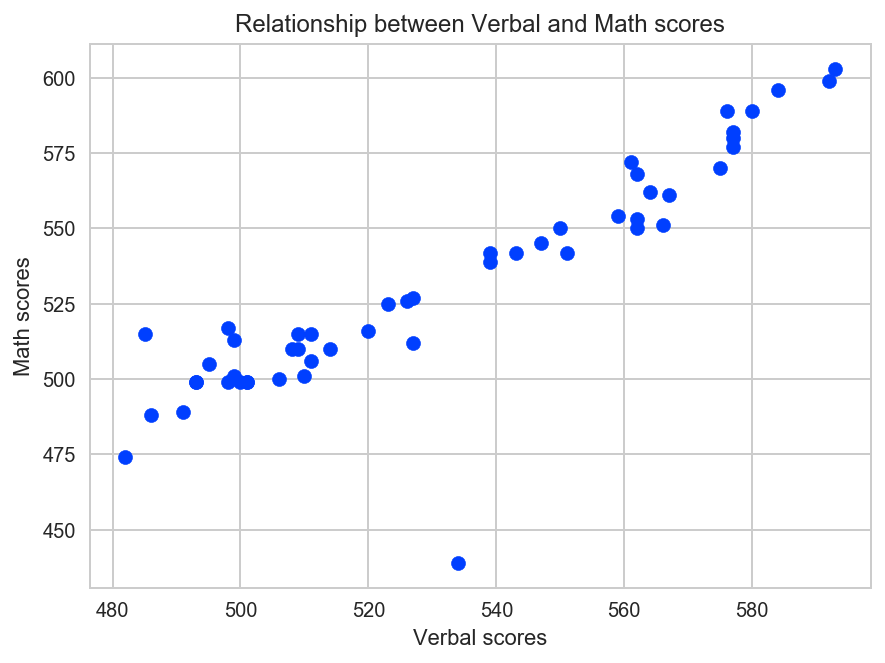

In [394]:
# Scatterplot to visualise Verbal and Math scores
plt.scatter(x=Verbal_Math['Verbal'], y=Verbal_Math['Math'])
plt.xlabel('Verbal scores')
plt.ylabel('Math scores')
plt.title('Relationship between Verbal and Math scores')

In [395]:
x = np.corrcoef(Verbal_Math['Verbal'],Verbal_Math['Math'])[0,1]
print 'Correlation between Verbal and Math scores:', x

Correlation between Verbal and Math scores: 0.899909318181


**Comments:**

>Most of the points are clustered along a straight line, indicating that there is a strong positive linear relationship between Verbal and Math scores. However there seems to be 2 outliers in the plot, one at the bottom and one towards the left of the plot, causing the correlation coefficient to be only 0.8999.

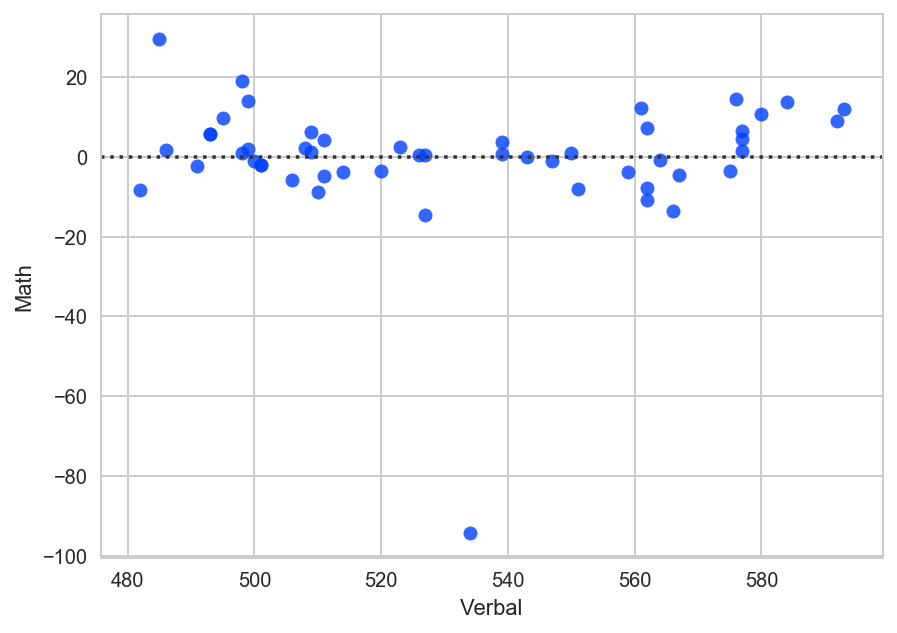

In [396]:
#Plotting the residual plot to check for bivariate outliers
sns.residplot(x=Verbal_Math['Verbal'], y=Verbal_Math['Math'])

**Comments:**
>There are 2 outliers, one at bottom middle, with a verbal score of around 535 and math score of around 425, and one at at the top left, with a verbal score of around 485 and math score of around 510.

In [397]:
#Identifying the outliers
outlier_1 = Verbal_Math[(Verbal_Math['Verbal']<490) & (Verbal_Math['Math']>510)]
outlier_2 = Verbal_Math[(Verbal_Math['Verbal']>530) & (Verbal_Math['Math']<450)]
print outlier_1
print outlier_2

    Verbal  Math
21  485     515 
    Verbal  Math
27  534     439 


>The outliers have an index of 21 and 27 respectively

In [398]:
#Removing the outliers
Verbal_Math2 = Verbal_Math.drop([21,27], axis=0)

In [399]:
Verbal_Math2

,Verbal,Math
0,509,510
1,499,513
2,511,515
3,495,505
4,520,516
5,501,499
6,500,499
7,511,506
8,506,500
9,510,501


In [400]:
#Original mean, median, standard deviation
Verbal_Math.describe()

,Verbal,Math
count,51.000000,51.000000
mean,532.529412,531.843137
std,33.360667,36.287393
min,482.000000,439.000000
25%,501.000000,503.000000
50%,527.000000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


In [401]:
#Mean, median, standard deviation of cleaned data
Verbal_Math2.describe()

,Verbal,Math
count,49.000000,49.000000
mean,533.469388,534.081633
std,33.336105,34.366188
min,482.000000,474.000000
25%,501.000000,505.000000
50%,527.000000,526.000000
75%,562.000000,561.000000
max,593.000000,603.000000


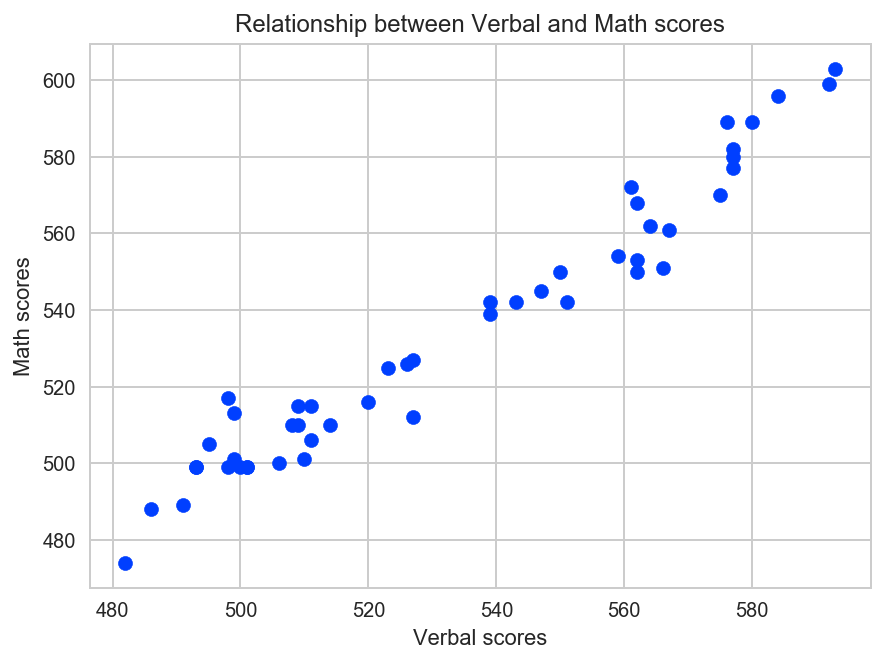

In [402]:
# Scatterplot to visualise Verbal and Math scores of the cleaned data
plt.scatter(x=Verbal_Math2['Verbal'], y=Verbal_Math2['Math'])
plt.xlabel('Verbal scores')
plt.ylabel('Math scores')
plt.title('Relationship between Verbal and Math scores')

In [403]:
#Correlation coefficient of the cleaned data
y = np.corrcoef(Verbal_Math2['Verbal'],Verbal_Math2['Math'])[0,1]
print 'Correlation between Verbal and Math scores:', y

Correlation between Verbal and Math scores: 0.976589569495


**Comments:**
>The correlation coefficient has improved from 0.8999 to 0.977 after removing the outliers.
>Outliers had a strong influence on correlation coefficient.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [404]:
sat_df2

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [405]:
#Calculating the spearman rank correlation
stats.spearmanr(sat_df2['Verbal'], sat_df2['Math'])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

In [406]:
#Calculating the pearson r correlation
stats.pearsonr(sat_df2['Verbal'], sat_df2['Math'])

(0.89990931818110476, 2.735579353543464e-19)

**Comments:**
>The spearman correlation is higher than the pearson correlation by 0.01. 

>The spearman correlation checks the strength of a relationship between 2 variables. The values of each of the 2 variables, 'Math' and 'Verbal' are ranked from the smallest value to the largest value. The difference in the ranks between each entry of the 2 variables is then calculated. Each difference score is squared and these scores are summed together.

>The spearman correlation is calculated as follows:

1-6*summation(difference squared)/(N^3 - N), where N refers to the number of values 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [408]:
rate_p = sat_df2['Rate']

In [409]:
#Converting rate to percentiles
rate_per = [stats.percentileofscore(rate_p, a, kind = 'rank') for a in rate_p]

In [410]:
sat_df2['Rate_percentiles'] = rate_per

In [411]:
sat_df2.head()

,State,Rate,Verbal,Math,Rate_percentiles
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.039216
2,MA,79,511,515,96.078431
3,NY,77,495,505,94.117647
4,NH,72,520,516,92.156863


In [412]:
#Percentile of California in Rate
sat_df2[sat_df2['State']=='CA']

,State,Rate,Verbal,Math,Rate_percentiles
23,CA,51,498,517,55.882353


Percentile of California is 55.88

**Comments:**

>Qn: How is percentile related to the spearman rank correlation?

>Ans: The higher the percentile of the score, the higher the rank of the score in the spearman rank correlation

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

**Comments:**

Qn 1: Why might percentile scoring be useful for dealing with outliers?
    
Ans: We can calculate the 25th, 50th and 75th percentiles of our data. The inetrquartile rangs(IQR) is calculated as (75th percentile - 25th percentile). The criteria for an outlier is defined as follows:

Lower outlier = 25th percentile score - 1.5*IQR
Higher outlier = 75th percentile score + 1.5*IQR

Hence using percentile scoring, if the score of a value falls in the Lower outlier range or Higher outlier range, then it can be classified as an outlier. 

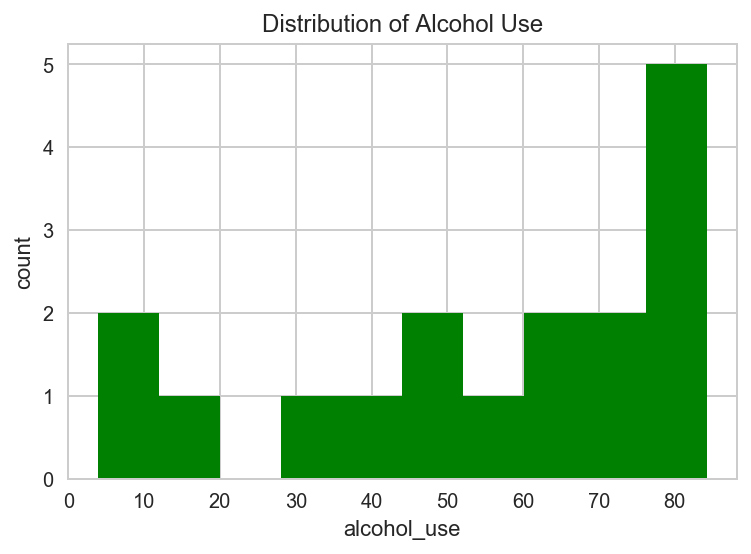

In [413]:
#Qn2. Plotting the distribuiton of alcohol_use by age
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
ax.hist(drugs['alcohol_use'], color='g')
ax.set_title('Distribution of Alcohol Use')
ax.set_xlabel('alcohol_use')
ax.set_ylabel('count')

In [414]:
#Convert alcohol_use to percentile scores
alcohol_use_p = [stats.percentileofscore(drugs['alcohol_use'], a, kind='rank') for a in drugs['alcohol_use']]

In [415]:
alcohol_use_p

[5.8823529411764701,
 11.76470588235294,
 17.647058823529413,
 23.52941176470588,
 29.411764705882355,
 38.235294117647058,
 47.058823529411761,
 52.941176470588239,
 64.705882352941174,
 94.117647058823522,
 100.0,
 88.235294117647058,
 82.35294117647058,
 76.470588235294116,
 70.588235294117652,
 58.82352941176471,
 38.235294117647058]

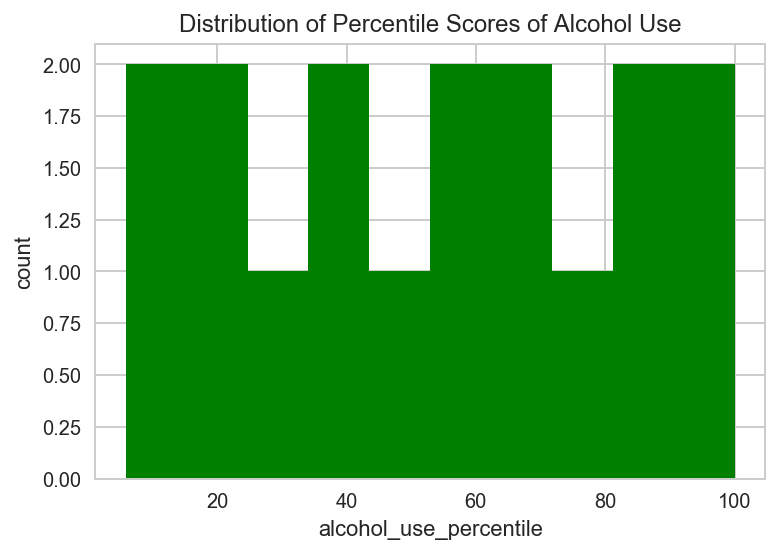

In [416]:
#Plotting the percentile scores of alcohol_use
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.gca()

ax1.hist(alcohol_use_p, color='g')
ax1.set_title('Distribution of Percentile Scores of Alcohol Use')
ax1.set_xlabel('alcohol_use_percentile')
ax1.set_ylabel('count')

**Visual effects of converting raw scores to percentiles:**

>Converting raw scores to percentiles standardizes the raw scores on a scale of 0-100 for easy comparison between the ranking of the values of the raw scores.
>The distribution of the alcohol_use variable changed from right-skewed to a more uniform distribution when it was converted to percentiles.